Import Important Library

In [3]:
from statistics import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 2.1.4
numpy version: 1.26.4
seaborn version: 0.12.2
sklearn version: 1.2.2


In [5]:
data = pd.read_csv("C:/Users/Bank/Desktop/data.csv")

EDA (Exploratory Data Analysis)

In [6]:
# Rows and columns checking
data.shape

(1500014, 15)

In [7]:
# Check top 10 rows [by indexs]
data.head(10)

,Unnamed: 0,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
2,2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
3,3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
4,4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
5,5,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
6,6,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
7,7,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18
8,8,Asia,Sri Lanka,Fruits,Online,L,11/7/2011,830192887,12/18/2011,1379,9.33,6.92,12866.07,9542.68,3323.39
9,9,Sub-Saharan Africa,Seychelles,Beverages,Online,M,1/18/2013,425793445,2/16/2013,597,47.45,31.79,28327.65,18978.63,9349.02


In [18]:
# Delete column we don't need
data = data.drop(columns=['Unnamed: 0'])

In [13]:
data.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00


In [14]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500009,Asia,India,Snacks,Online,L,10/10/2012,440306556,11/20/2012,5349,152.58,97.44,NaN,NaN,NaN
1500010,Australia and Oceania,NaN,Household,Online,L,12/5/2016,937431466,12/8/2016,5657,668.27,502.54,3780403.39,2842868.78,937534.61
1500011,Central America and the Caribbean,NaN,Household,Offline,C,11/19/2011,274930989,12/13/2011,7044,668.27,502.54,4707293.88,3539891.76,1167402.12
1500012,Asia,Brunei,Cereal,Offline,L,5/28/2013,153842341,7/16/2013,4222,205.70,117.11,NaN,NaN,NaN


In [15]:
# Column checking
list(data.columns)

['Region',
 'Country',
 'Item Type',
 'Sales Channel',
 'Order Priority',
 'Order Date',
 'Order ID',
 'Ship Date',
 'Units Sold',
 'Unit Price',
 'Unit Cost',
 'Total Revenue',
 'Total Cost',
 'Total Profit']

In [28]:
data.describe().round(1)

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1500014.0,1500014.0,1500014.0,1500014.0,1500009.0,1500009.0,1.500009e+06
mean,550067936.5,4999.3,266.1,187.6,1329889.2,937489.1,5.939205e+07
std,259983330.2,2885.6,217.0,175.7,1468814.3,1149109.1,7.144790e+10
min,100001180.0,1.0,9.3,6.9,9.3,6.9,2.400000e+00
25%,324686824.8,2501.0,81.7,35.8,277718.5,161817.6,9.506640e+04
50%,549791538.0,4998.0,154.1,97.4,785329.3,467357.5,2.813704e+05
75%,775627314.8,7498.0,421.9,263.3,1821933.4,1196571.5,5.654252e+05
max,999999892.0,10000.0,668.3,525.0,6682700.0,5249600.0,8.750000e+13


In [26]:
# คำสั่ง infoเป็นการดูภาพดูของ data เช่นกัน แต่เราจะเห็นข้อมูลที่อยู่ใน columns นั้นๆด้วย
data.info

<bound method DataFrame.info of                                     Region           Country  Item Type  \
0                       Sub-Saharan Africa      South Africa     Fruits   
1                       Sub-Saharan Africa      South Africa     Fruits   
2             Middle East and North Africa           Morocco    Clothes   
3             Middle East and North Africa           Morocco    Clothes   
4                    Australia and Oceania  Papua New Guinea       Meat   
...                                    ...               ...        ...   
1500009                               Asia             India     Snacks   
1500010              Australia and Oceania               NaN  Household   
1500011  Central America and the Caribbean               NaN  Household   
1500012                               Asia            Brunei     Cereal   
1500013       Middle East and North Africa            Israel  Beverages   

        Sales Channel Order Priority  Order Date   Order ID   Ship 

In [8]:
# Prepare Data
# Null checking
data.isnull()

,Unnamed: 0,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500009,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1500010,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1500011,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1500012,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True


In [10]:
data.isnull().sum()

Unnamed: 0        0
Region            2
Country           6
Item Type         1
Sales Channel     1
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     5
Total Cost        5
Total Profit      5
dtype: int64

In [13]:
# Clear row that be null in Country column
data = data[data["Country"].notnull()]
data.shape

(1500008, 15)

In [12]:
# We are still having null value in Revenue , Cost and Profit. We will clear these nulls in other step.
data.info

<bound method DataFrame.info of          Unnamed: 0                        Region           Country  \
0                 0            Sub-Saharan Africa      South Africa   
1                 1            Sub-Saharan Africa      South Africa   
2                 2  Middle East and North Africa           Morocco   
3                 3  Middle East and North Africa           Morocco   
4                 4         Australia and Oceania  Papua New Guinea   
...             ...                           ...               ...   
1500006     1500006            Sub-Saharan Africa          Zimbabwe   
1500008     1500008         Australia and Oceania           Vanuatu   
1500009     1500009                          Asia             India   
1500012     1500012                          Asia            Brunei   
1500013     1500013  Middle East and North Africa            Israel   

               Item Type Sales Channel Order Priority  Order Date   Order ID  \
0                 Fruits       Offl

In [37]:
data = data.rename(columns = {"Item Type" : "Item_Type",
                             "Order Date" : "Order_Date"                          
                             })

In [38]:
list(data.columns)

['Region',
 'Country',
 'Item_Type',
 'Sales Channel',
 'Order Priority',
 'Order_Date',
 'Order ID',
 'Ship Date',
 'Units Sold',
 'Unit Price',
 'Unit Cost',
 'Total Revenue',
 'Total Cost',
 'Total Profit']

In [35]:
# Create column %margin by using profit and revenue column.
data["%margin"] = ((data["Total Profit"] / data["Total Revenue"]) *100).round(2) 

In [36]:
data.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00,13.56


In [54]:
# Create class for defining the value 
def if_condition(row):            # Create function
    if row["%margin"] > 30:       # Determine row that more than 30
        val = "Good"              # Then return Good
    else:                         
        val = "Bad"               # If not then return Bad
    return val                    

In [55]:
# Creaet column dicision by using value above step.
data["dicision"] = data.apply(if_condition, axis=1) #ในที่นี้ axis = 1 คือ columns 

In [67]:
data.sort_values(by = ['%margin','Total Profit'],ascending = True)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
94540,Middle East and North Africa,Tunisia,Meat,Online,M,7/19/2017,188195216,8/29/2017,1,421.89,364.69,421.89,364.69,57.2,13.56,Bad
270412,Europe,Macedonia,Meat,Online,C,5/1/2017,389464318,5/13/2017,1,421.89,364.69,421.89,364.69,57.2,13.56,Bad
607474,Sub-Saharan Africa,Mali,Meat,Online,C,4/5/2017,756554019,4/24/2017,1,421.89,364.69,421.89,364.69,57.2,13.56,Bad
621015,Sub-Saharan Africa,Mozambique,Meat,Offline,H,5/20/2017,144737851,6/30/2017,1,421.89,364.69,421.89,364.69,57.2,13.56,Bad
645107,Asia,Bhutan,Meat,Offline,L,4/15/2017,634190785,5/18/2017,1,421.89,364.69,421.89,364.69,57.2,13.56,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500006,Sub-Saharan Africa,Zimbabwe,Office Supplies,Offline,C,3/28/2011,953361213,4/8/2011,9623,651.21,524.96,NaN,NaN,NaN,NaN,Bad
1500008,Australia and Oceania,Vanuatu,Fruits,Online,C,11/3/2013,571997869,11/11/2013,5735,9.33,6.92,NaN,NaN,NaN,NaN,Bad
1500009,Asia,India,Snacks,Online,L,10/10/2012,440306556,11/20/2012,5349,152.58,97.44,NaN,NaN,NaN,NaN,Bad
1500012,Asia,Brunei,Cereal,Offline,L,5/28/2013,153842341,7/16/2013,4222,205.70,117.11,NaN,NaN,NaN,NaN,Bad


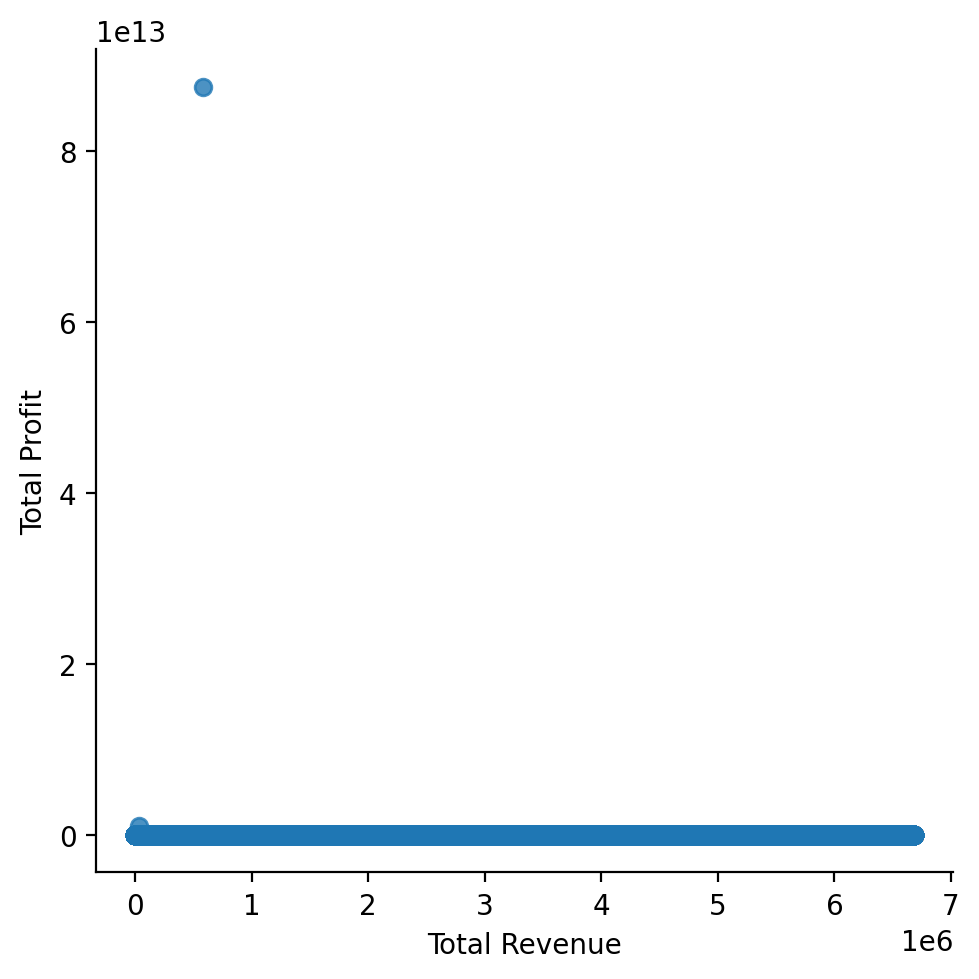

In [16]:
# Scatter plot
sns.lmplot(x = "Total Revenue", y = "Total Profit", data = data, ci= None)# CI = confident interval [=0]
# We found that, there is one profit that be outliner then we have to check it again.


In [24]:
# Check max value that be outliner
data.loc[data['Total Profit'].idxmax()] 

Region            Sub-Saharan Africa
Country                        Ghana
Item Type            Office Supplies
Sales Channel                    NaN
Order Priority                     L
Order Date                 3/23/2017
Order ID                   601245963
Ship Date                  4/15/2017
Units Sold                       896
Unit Price                    651.21
Unit Cost                     524.96
Total Revenue              583484.16
Total Cost                 470364.16
Total Profit        87500000000000.0
Name: 1500003, dtype: object

In [23]:
data.sort_values("Total Profit", ascending = False).head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
1500003,Sub-Saharan Africa,Ghana,Office Supplies,NaN,L,3/23/2017,601245963,4/15/2017,896,651.21,524.96,583484.16,470364.16,8.750000e+13
1500005,Sub-Saharan Africa,Uganda,Personal Care,Online,M,6/19/2014,539471471,7/21/2014,451,81.73,56.67,36860.23,25558.17,1.000000e+12
897995,Asia,Maldives,Cosmetics,Online,H,4/12/2016,340228402,5/23/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06
1279511,Asia,Kyrgyzstan,Cosmetics,Offline,H,2/28/2016,952044570,3/18/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06
969307,Sub-Saharan Africa,South Sudan,Cosmetics,Offline,L,4/3/2016,462591636,4/30/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06
275470,Sub-Saharan Africa,Senegal,Cosmetics,Online,M,2/18/2016,174407804,2/22/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06
942016,Middle East and North Africa,United Arab Emirates,Cosmetics,Offline,L,3/8/2016,829681336,4/11/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06
1467797,Europe,Romania,Cosmetics,Online,M,3/17/2016,707318103,5/4/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06
583126,Asia,Maldives,Cosmetics,Online,H,4/11/2016,340228402,5/22/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06
1426741,Sub-Saharan Africa,Zambia,Cosmetics,Offline,C,6/30/2016,138959300,7/20/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06


In [26]:
# Delete rows that be outliner because indexs = 1500003 and 1500005 are over value that I don't want.
data = data.drop(1500005)
data = data.drop(1500003)

In [27]:
data.sort_values("Total Profit", ascending = False).head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
275470,Sub-Saharan Africa,Senegal,Cosmetics,Online,M,2/18/2016,174407804,2/22/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0
829606,Europe,Armenia,Cosmetics,Offline,C,4/21/2016,217865169,4/26/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0
1279511,Asia,Kyrgyzstan,Cosmetics,Offline,H,2/28/2016,952044570,3/18/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0


In [28]:
data.sort_values("Total Profit", ascending = True).head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
492352,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41
1016058,Europe,Luxembourg,Fruits,Offline,L,6/14/2013,412308156,7/19/2013,1,9.33,6.92,9.33,6.92,2.41
801014,Central America and the Caribbean,Trinidad and Tobago,Fruits,Offline,L,9/18/2013,866312587,10/31/2013,1,9.33,6.92,9.33,6.92,2.41


In [30]:
data.sort_values("Total Revenue", ascending = False).head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
468659,Sub-Saharan Africa,Comoros,Household,Online,L,6/26/2011,546093308,7/3/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0
142999,Sub-Saharan Africa,Senegal,Household,Online,C,2/24/2011,459178578,3/2/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0
1099878,Europe,Bosnia and Herzegovina,Household,Online,M,6/9/2011,790819776,7/7/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0
1085903,Europe,Sweden,Household,Offline,C,6/18/2011,668456542,7/31/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0
803322,Sub-Saharan Africa,Zimbabwe,Household,Offline,H,7/5/2011,423730075,7/26/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0
727845,Middle East and North Africa,Yemen,Household,Offline,H,3/14/2011,214452111,4/18/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0
402635,Sub-Saharan Africa,Cape Verde,Household,Online,M,5/14/2011,257909476,6/19/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0
1028057,Europe,Armenia,Household,Offline,H,4/26/2011,502635943,5/2/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0
142998,Sub-Saharan Africa,Senegal,Household,Online,C,2/24/2011,459178578,3/2/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0
1399426,Europe,Slovakia,Household,Online,C,5/5/2011,380272710,5/26/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0


In [31]:
data.sort_values("Total Revenue", ascending = True).head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
470541,Europe,Monaco,Fruits,Offline,C,7/27/2013,700491988,8/2/2013,1,9.33,6.92,9.33,6.92,2.41
492351,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41
575497,Middle East and North Africa,Tunisia,Fruits,Online,M,8/31/2013,211039054,9/14/2013,1,9.33,6.92,9.33,6.92,2.41
470540,Europe,Monaco,Fruits,Offline,C,7/27/2013,700491988,8/2/2013,1,9.33,6.92,9.33,6.92,2.41
801014,Central America and the Caribbean,Trinidad and Tobago,Fruits,Offline,L,9/18/2013,866312587,10/31/2013,1,9.33,6.92,9.33,6.92,2.41
426590,Middle East and North Africa,Qatar,Fruits,Online,H,7/18/2013,822855222,8/30/2013,1,9.33,6.92,9.33,6.92,2.41
1016058,Europe,Luxembourg,Fruits,Offline,L,6/14/2013,412308156,7/19/2013,1,9.33,6.92,9.33,6.92,2.41
1239029,Asia,China,Fruits,Offline,L,7/10/2013,945218455,8/7/2013,1,9.33,6.92,9.33,6.92,2.41
575498,Middle East and North Africa,Tunisia,Fruits,Online,M,8/31/2013,211039054,9/14/2013,1,9.33,6.92,9.33,6.92,2.41
492352,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41


In [37]:
data.sort_values("%margin", ascending = False).head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin
1092717,Central America and the Caribbean,Antigua and Barbuda,Clothes,Offline,H,12/23/2016,202264583,1/12/2017,3440,109.28,35.84,375923.20,123289.60,252633.60,67.2
1244997,Europe,France,Clothes,Offline,C,11/21/2012,334083354,12/10/2012,1543,109.28,35.84,168619.04,55301.12,113317.92,67.2
398974,Europe,France,Clothes,Online,M,9/15/2013,835613095,10/14/2013,5339,109.28,35.84,583445.92,191349.76,392096.16,67.2
1245020,Sub-Saharan Africa,Eritrea,Clothes,Offline,C,10/31/2015,608909356,11/28/2015,8665,109.28,35.84,946911.20,310553.60,636357.60,67.2
158959,Central America and the Caribbean,Panama,Clothes,Offline,L,6/27/2010,991353738,7/15/2010,2456,109.28,35.84,268391.68,88023.04,180368.64,67.2
158960,Central America and the Caribbean,Panama,Clothes,Offline,L,6/27/2010,991353738,7/15/2010,2456,109.28,35.84,268391.68,88023.04,180368.64,67.2
610824,Australia and Oceania,Federated States of Micronesia,Clothes,Online,C,9/21/2016,818090331,10/21/2016,9964,109.28,35.84,1088865.92,357109.76,731756.16,67.2
861058,Europe,United Kingdom,Clothes,Online,H,6/11/2016,448429572,7/1/2016,9130,109.28,35.84,997726.40,327219.20,670507.20,67.2
861060,Sub-Saharan Africa,Madagascar,Clothes,Online,C,6/6/2015,936628949,7/19/2015,8175,109.28,35.84,893364.00,292992.00,600372.00,67.2
1245001,Sub-Saharan Africa,Equatorial Guinea,Clothes,Offline,L,12/18/2011,223178088,12/29/2011,2211,109.28,35.84,241618.08,79242.24,162375.84,67.2


In [38]:
data.sort_values("%margin", ascending = True).head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin
143232,Sub-Saharan Africa,Uganda,Meat,Offline,C,4/10/2013,598110997,5/14/2013,3190,421.89,364.69,1345829.10,1163361.10,182468.0,13.56
831099,Asia,Thailand,Meat,Offline,H,9/13/2015,261373174,9/14/2015,4985,421.89,364.69,2103121.65,1817979.65,285142.0,13.56
556991,Middle East and North Africa,Morocco,Meat,Online,H,10/31/2012,510798871,12/9/2012,5592,421.89,364.69,2359208.88,2039346.48,319862.4,13.56
1151936,Sub-Saharan Africa,Comoros,Meat,Online,C,10/27/2015,775944459,11/19/2015,8063,421.89,364.69,3401699.07,2940495.47,461203.6,13.56
623841,Sub-Saharan Africa,Zimbabwe,Meat,Online,M,4/4/2014,380536210,5/22/2014,7976,421.89,364.69,3364994.64,2908767.44,456227.2,13.56
232678,Europe,Denmark,Meat,Online,C,11/27/2015,505518567,12/5/2015,3033,421.89,364.69,1279592.37,1106104.77,173487.6,13.56
743311,Central America and the Caribbean,Dominica,Meat,Offline,L,4/15/2013,884086835,5/23/2013,9796,421.89,364.69,4132834.44,3572503.24,560331.2,13.56
743303,Central America and the Caribbean,Nicaragua,Meat,Online,H,11/25/2013,309718167,1/7/2014,1343,421.89,364.69,566598.27,489778.67,76819.6,13.56
668415,Europe,Luxembourg,Meat,Online,M,3/21/2017,741202771,3/22/2017,7226,421.89,364.69,3048577.14,2635249.94,413327.2,13.56
272985,Middle East and North Africa,Kuwait,Meat,Offline,H,9/22/2014,974938189,11/8/2014,4730,421.89,364.69,1995539.70,1724983.70,270556.0,13.56


In [44]:
data.tail(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin
1499996,Australia and Oceania,Samoa,Snacks,Offline,M,8/21/2013,346272170,9/11/2013,8485,152.58,97.44,1294641.30,826778.40,467862.90,36.14
1499997,Europe,Denmark,Baby Food,Online,L,2/27/2017,458885467,3/23/2017,3262,255.28,159.42,832723.36,520028.04,312695.32,37.55
1499998,Middle East and North Africa,Jordan,Cereal,Offline,L,5/27/2012,925852906,6/22/2012,9304,205.70,117.11,1913832.80,1089591.44,824241.36,43.07
1499999,Sub-Saharan Africa,Djibouti,Fruits,Online,H,9/1/2013,385552585,9/7/2013,2432,9.33,6.92,22690.56,16829.44,5861.12,25.83
1500004,NaN,Tanzania,Cosmetics,Offline,L,5/23/2016,739008080,5/24/2016,7768,437.20,263.33,3396169.60,2045547.44,1350622.16,39.77
1500006,Sub-Saharan Africa,Zimbabwe,Office Supplies,Offline,C,3/28/2011,953361213,4/8/2011,9623,651.21,524.96,6266593.83,5051690.08,1214903.75,19.39
1500008,Australia and Oceania,Vanuatu,Fruits,Online,C,11/3/2013,571997869,11/11/2013,5735,9.33,6.92,53507.55,39686.20,13821.35,25.83
1500009,Asia,India,Snacks,Online,L,10/10/2012,440306556,11/20/2012,5349,152.58,97.44,816150.42,521206.56,294943.86,36.14
1500012,Asia,Brunei,Cereal,Offline,L,5/28/2013,153842341,7/16/2013,4222,205.70,117.11,868465.40,494438.42,374026.98,43.07
1500013,Middle East and North Africa,Israel,Beverages,Offline,H,9/8/2013,371502530,10/13/2013,4709,47.45,31.79,223442.05,149699.11,73742.94,33.00


In [40]:
data.isnull().sum()

Region            1
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     5
Total Cost        5
Total Profit      5
%margin           5
dtype: int64

In [41]:
# Impute data that be missing value or outliner.
data["Total Revenue"] = (data["Units Sold"] * data["Unit Price"]).round(2) 
data["Total Cost"] = (data["Units Sold"] * data["Unit Cost"]).round(2)
data["Total Profit"] = (data["Total Revenue"] - data["Total Cost"]).round(2)
data["%margin"] = ((data["Total Profit"] / data["Total Revenue"]) *100).round(2)

In [42]:
data.info

<bound method DataFrame.info of                                Region           Country        Item Type  \
0                  Sub-Saharan Africa      South Africa           Fruits   
1                  Sub-Saharan Africa      South Africa           Fruits   
2        Middle East and North Africa           Morocco          Clothes   
3        Middle East and North Africa           Morocco          Clothes   
4               Australia and Oceania  Papua New Guinea             Meat   
...                               ...               ...              ...   
1500006            Sub-Saharan Africa          Zimbabwe  Office Supplies   
1500008         Australia and Oceania           Vanuatu           Fruits   
1500009                          Asia             India           Snacks   
1500012                          Asia            Brunei           Cereal   
1500013  Middle East and North Africa            Israel        Beverages   

        Sales Channel Order Priority  Order Date   Orde

In [43]:
data.isnull().sum()

Region            1
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
%margin           0
dtype: int64

In [46]:
# Add coulumn year.
data['year'] = pd.DatetimeIndex(data['Order Date']).year

In [47]:
# Add column month.
data['month'] = pd.DatetimeIndex(data['Order Date']).month

In [48]:
data = data.replace({"month":{
    1 : "1.January",
    2 : "2.Febuary",
    3 : "3.March",
    4 : "4.April",
    5 : "5.May",
    6 : "6.June",
    7 : "7.July",
    8 : "8.August",
    9 : "9.September",
    10 : "10.October",
    11 : "11.November",
    12 : "12.December"
}})

In [54]:
data.sort_values(by = 'month',ascending = True)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,year,month
627437,Sub-Saharan Africa,Guinea,Fruits,Offline,M,1/16/2011,259472024,2/14/2011,2393,9.33,6.92,22326.69,16559.56,5767.13,25.83,2011,1.January
563946,Australia and Oceania,Papua New Guinea,Fruits,Offline,C,1/15/2015,296495950,2/13/2015,8595,9.33,6.92,80191.35,59477.40,20713.95,25.83,2015,1.January
130958,Sub-Saharan Africa,Senegal,Snacks,Offline,H,1/23/2010,225155627,2/16/2010,7408,152.58,97.44,1130312.64,721835.52,408477.12,36.14,2010,1.January
130959,Sub-Saharan Africa,Senegal,Snacks,Offline,H,1/23/2010,225155627,2/16/2010,7408,152.58,97.44,1130312.64,721835.52,408477.12,36.14,2010,1.January
563945,Australia and Oceania,Papua New Guinea,Fruits,Offline,C,1/15/2015,296495950,2/13/2015,8595,9.33,6.92,80191.35,59477.40,20713.95,25.83,2015,1.January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723949,Sub-Saharan Africa,Seychelles,Beverages,Offline,C,9/14/2016,603234231,10/12/2016,9269,47.45,31.79,439814.05,294661.51,145152.54,33.00,2016,9.September
723944,Sub-Saharan Africa,Lesotho,Snacks,Online,L,9/4/2010,428501403,9/23/2010,1942,152.58,97.44,296310.36,189228.48,107081.88,36.14,2010,9.September
723934,Middle East and North Africa,Yemen,Vegetables,Offline,M,9/14/2014,573406779,10/16/2014,2663,154.06,90.93,410261.78,242146.59,168115.19,40.98,2014,9.September
723748,Europe,Macedonia,Fruits,Online,H,9/3/2010,110527884,9/29/2010,6512,9.33,6.92,60756.96,45063.04,15693.92,25.83,2010,9.September


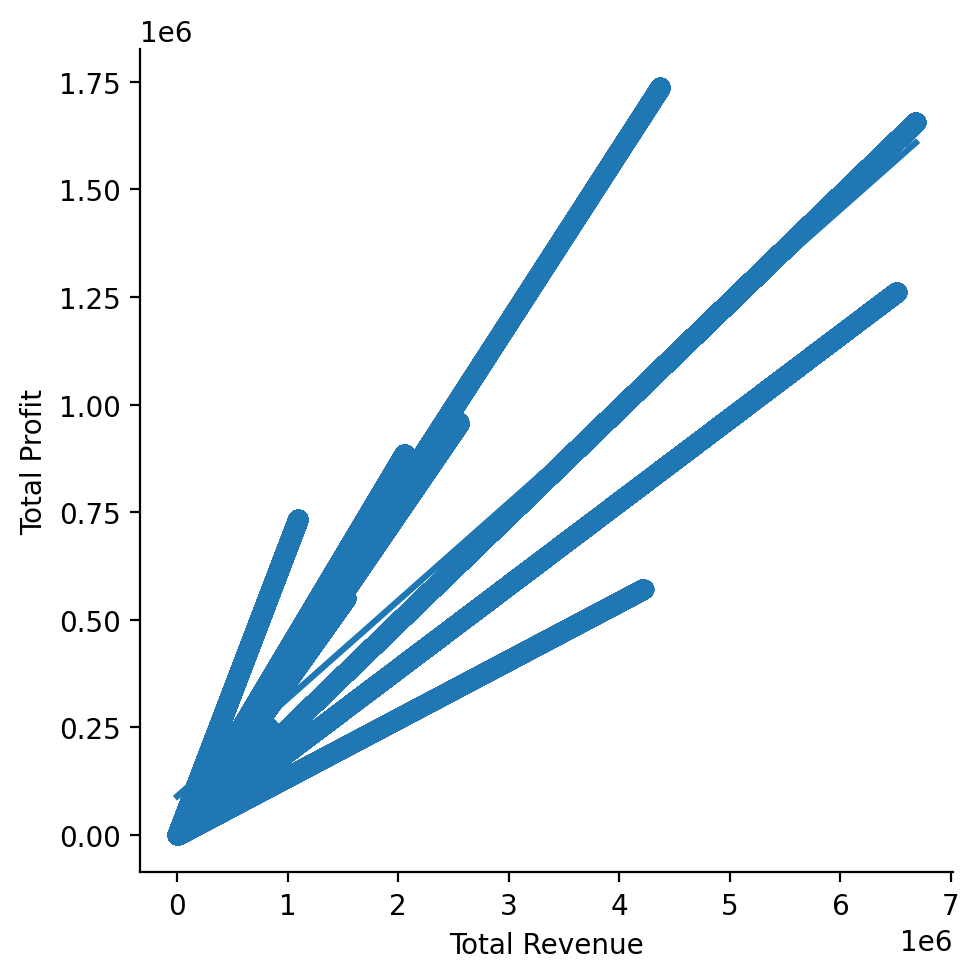

In [55]:
sns.lmplot(x = "Total Revenue", y = "Total Profit", data = data, ci= None)

In [56]:
data.sort_values("Total Profit", ascending = True) 

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,year,month
576729,Central America and the Caribbean,Honduras,Fruits,Online,M,6/22/2013,289944922,8/11/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,2013,6.June
801014,Central America and the Caribbean,Trinidad and Tobago,Fruits,Offline,L,9/18/2013,866312587,10/31/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,2013,9.September
669807,Central America and the Caribbean,Grenada,Fruits,Online,H,5/10/2013,901761090,6/7/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,2013,5.May
492351,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,2013,5.May
492352,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,2013,5.May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969307,Sub-Saharan Africa,South Sudan,Cosmetics,Offline,L,4/3/2016,462591636,4/30/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,2016,4.April
1180739,Europe,Sweden,Cosmetics,Offline,L,6/12/2016,383685767,7/24/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,2016,6.June
691631,Europe,Slovakia,Cosmetics,Online,M,4/29/2016,995501935,5/19/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,2016,4.April
1467797,Europe,Romania,Cosmetics,Online,M,3/17/2016,707318103,5/4/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,2016,3.March


In [57]:
data.sort_values("Total Profit", ascending = False)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,year,month
969307,Sub-Saharan Africa,South Sudan,Cosmetics,Offline,L,4/3/2016,462591636,4/30/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,2016,4.April
691631,Europe,Slovakia,Cosmetics,Online,M,4/29/2016,995501935,5/19/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,2016,4.April
342508,Sub-Saharan Africa,Comoros,Cosmetics,Online,H,6/20/2016,261322534,6/25/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,2016,6.June
829606,Europe,Armenia,Cosmetics,Offline,C,4/21/2016,217865169,4/26/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,2016,4.April
1218962,Sub-Saharan Africa,Botswana,Cosmetics,Offline,C,3/25/2016,584954869,4/6/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,2016,3.March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470540,Europe,Monaco,Fruits,Offline,C,7/27/2013,700491988,8/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,2013,7.July
576730,Central America and the Caribbean,Honduras,Fruits,Online,M,6/22/2013,289944922,8/11/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,2013,6.June
1239029,Asia,China,Fruits,Offline,L,7/10/2013,945218455,8/7/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,2013,7.July
426590,Middle East and North Africa,Qatar,Fruits,Online,H,7/18/2013,822855222,8/30/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,2013,7.July


In [58]:
data.sort_values("Total Profit", ascending = False).head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,year,month
969307,Sub-Saharan Africa,South Sudan,Cosmetics,Offline,L,4/3/2016,462591636,4/30/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,2016,4.April
691631,Europe,Slovakia,Cosmetics,Online,M,4/29/2016,995501935,5/19/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,2016,4.April
342508,Sub-Saharan Africa,Comoros,Cosmetics,Online,H,6/20/2016,261322534,6/25/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,2016,6.June


In [59]:
data.sort_values("%margin", ascending = False)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,year,month
1087185,Asia,South Korea,Clothes,Offline,H,2/9/2014,770135867,2/10/2014,9172,109.28,35.84,1002316.16,328724.48,673591.68,67.20,2014,2.Febuary
108726,Sub-Saharan Africa,Ethiopia,Clothes,Online,C,2/4/2011,222123229,2/17/2011,54,109.28,35.84,5901.12,1935.36,3965.76,67.20,2011,2.Febuary
1155029,Australia and Oceania,East Timor,Clothes,Offline,C,3/12/2010,260976207,3/15/2010,7514,109.28,35.84,821129.92,269301.76,551828.16,67.20,2010,3.March
402045,Europe,Germany,Clothes,Online,H,6/30/2013,367244899,7/22/2013,4781,109.28,35.84,522467.68,171351.04,351116.64,67.20,2013,6.June
402047,Australia and Oceania,Vanuatu,Clothes,Online,M,7/21/2011,586752593,8/4/2011,1986,109.28,35.84,217030.08,71178.24,145851.84,67.20,2011,7.July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350837,Europe,Ireland,Meat,Offline,M,10/6/2014,573015391,11/3/2014,6843,421.89,364.69,2886993.27,2495573.67,391419.60,13.56,2014,10.October
1024564,Middle East and North Africa,Afghanistan,Meat,Offline,M,6/11/2013,429389321,7/11/2013,4697,421.89,364.69,1981617.33,1712948.93,268668.40,13.56,2013,6.June
111152,Europe,Slovakia,Meat,Offline,H,3/15/2011,609095180,4/12/2011,3654,421.89,364.69,1541586.06,1332577.26,209008.80,13.56,2011,3.March
111153,Europe,Slovakia,Meat,Offline,H,3/15/2011,609095180,4/12/2011,3654,421.89,364.69,1541586.06,1332577.26,209008.80,13.56,2011,3.March


In [60]:
Total_Amount = data["Total Profit"].sum().round(2)
Total_Amount

588603226440.65

In [61]:
Middle_East_Amount = data["Total Profit"][data["Region"] == "Middle East and North Africa"].sum().round(2)
Middle_East_Amount

73093917891.11

In [64]:
print("Total Profit of Middle East : " + str(Middle_East_Amount) + " Baht, It is : " + str(((Middle_East_Amount/Total_Amount).round(2))*100)+ "% of all region")

Total Profit of Middle East : 73093917891.11 Baht, It is : 12.0% of all region


In [71]:
data["Total Profit"][data["Country"] == "Iraq"].sum()

3159373979.71

In [66]:
data["Total Profit"][data["Country"] == "Iraq"].count()

8086

In [67]:
data["Total Profit"][data["Country"] == "Iraq"].max()

1736961.3

In [69]:
data["Total Profit"][data["Country"] == "Iraq"].min()

33.74

In [68]:
data["Total Profit"][data["Country"] == "Iraq"].mean()

390721.49143086816

In [70]:
data["Total Profit"][data["Country"] == "Iraq"].apply(lambda x : "{:,}".format(x)) 

268           87,058.44
740            7,348.09
741            7,348.09
1399         683,206.08
1400         683,206.08
               ...     
1498512    1,433,730.23
1498890       566,051.2
1499277       83,530.44
1499721      892,300.84
1499954      995,927.36
Name: Total Profit, Length: 8086, dtype: object

In [74]:
data.groupby(["year","month","Item Type","Order ID"]).sum() 

Region  \
year month     Item Type  Order ID                                          
2010 1.January Baby Food  101137149                 Australia and Oceania   
                          101335847                    Sub-Saharan Africa   
                          102081286                                  Asia   
                          102279984                 Australia and Oceania   
                          103224122                                  Asia   
...                                                                   ...   
2017 7.July    Vegetables 994640195                                  Asia   
                          995506656                                Europe   
                          995783030                                  Asia   
                          996804845  Sub-Saharan AfricaSub-Saharan Africa   
                          999913632                    Sub-Saharan Africa   

                                                Country Sales Channel  \
year month     Item Type  Order ID                                      
2010 1.January Baby Food  101137149          East Timor        Online   
                          101335847              Rwanda        Online   
                          102081286            Cambodia       Offline   
                          102279984            Kiribati        Online   
                          103224122               India        Online   
...                                                 ...           ...   
2017 7.July    Vegetables 994640195           Sri Lanka        Online   
                          995506656             Ukraine        Online   
                          995783030              Taiwan       Offline   
                          996804845  SwazilandSwaziland  OnlineOnline   
                          999913632               Ghana       Offline   

                                    Order Priority         Order Date  \
year month     Item Type  Order ID                                      
2010 1.January Baby Food  101137149              H          1/10/2010   
                          101335847              H          1/29/2010   
                          102081286              C           1/5/2010   
                          102279984              H          1/25/2010   
                          103224122              C          1/20/2010   
...                                            ...                ...   
2017 7.July    Vegetables 994640195              M          7/10/2017   
                          995506656              C          7/15/2017   
                          995783030              M          7/24/2017   
                          996804845             LL  7/9/20177/10/2017   
                          999913632              L           7/5/2017   

                                              Ship Date  Units Sold  \
year month     Item Type  Order ID                                    
2010 1.January Baby Food  101137149           1/27/2010        7585   
                          101335847            3/9/2010        6384   
                          102081286           1/22/2010        6976   
                          102279984            3/6/2010        5775   
                          103224122            3/1/2010        5166   
...                                                 ...         ...   
2017 7.July    Vegetables 994640195           8/28/2017        4992   
                          995506656            8/7/2017        1397   
                          995783030           8/14/2017        3182   
                          996804845  8/27/20178/28/2017       11120   
                          999913632           8/23/2017        5519   

                                     Unit Price  Unit Cost  Total Revenue  \
year month     Item Type  Order ID                                          
2010 1.January Baby Food  101137149      255.28     159.42     1936298.80   
          

In [75]:
data.groupby(["month"])["Total Profit"].sum().round(2)

month
1.January      5.262556e+10
10.October     4.588399e+10
11.November    4.490212e+10
12.December    4.626535e+10
2.Febuary      4.782907e+10
3.March        5.281875e+10
4.April        5.113972e+10
5.May          5.280839e+10
6.June         5.111819e+10
7.July         5.240162e+10
8.August       4.610811e+10
9.September    4.470235e+10
Name: Total Profit, dtype: float64

In [80]:
data.groupby(["Country","Item Type"])["Total Profit"].sum()

Country      Item Type      
Afghanistan  Baby Food          3.318292e+08
             Beverages          5.207576e+07
             Cereal             2.911936e+08
             Clothes            2.400776e+08
             Cosmetics          5.684838e+08
                                    ...     
Zimbabwe     Meat               1.907654e+08
             Office Supplies    4.377148e+08
             Personal Care      8.798709e+07
             Snacks             1.870779e+08
             Vegetables         2.121591e+08
Name: Total Profit, Length: 2220, dtype: float64

In [82]:
data.groupby(["Country","Item Type"])["Total Profit"].sum().round(2).apply(lambda x : "{:,}".format(x))

Country      Item Type      
Afghanistan  Baby Food          331,829,167.72
             Beverages            52,075,764.0
             Cereal             291,193,646.79
             Clothes            240,077,636.64
             Cosmetics          568,483,787.17
                                     ...      
Zimbabwe     Meat                190,765,432.0
             Office Supplies     437,714,810.0
             Personal Care       87,987,088.42
             Snacks              187,077,889.2
             Vegetables          212,159,097.1
Name: Total Profit, Length: 2220, dtype: object

In [85]:
export = data.groupby(["Country","Item Type"])["Total Profit"].sum().round(2).apply(lambda x : "{:,}".format(x))
export.to_excel("file.xlsx") 

Data Visulization

<Axes: xlabel='Total Revenue', ylabel='Total Profit'>

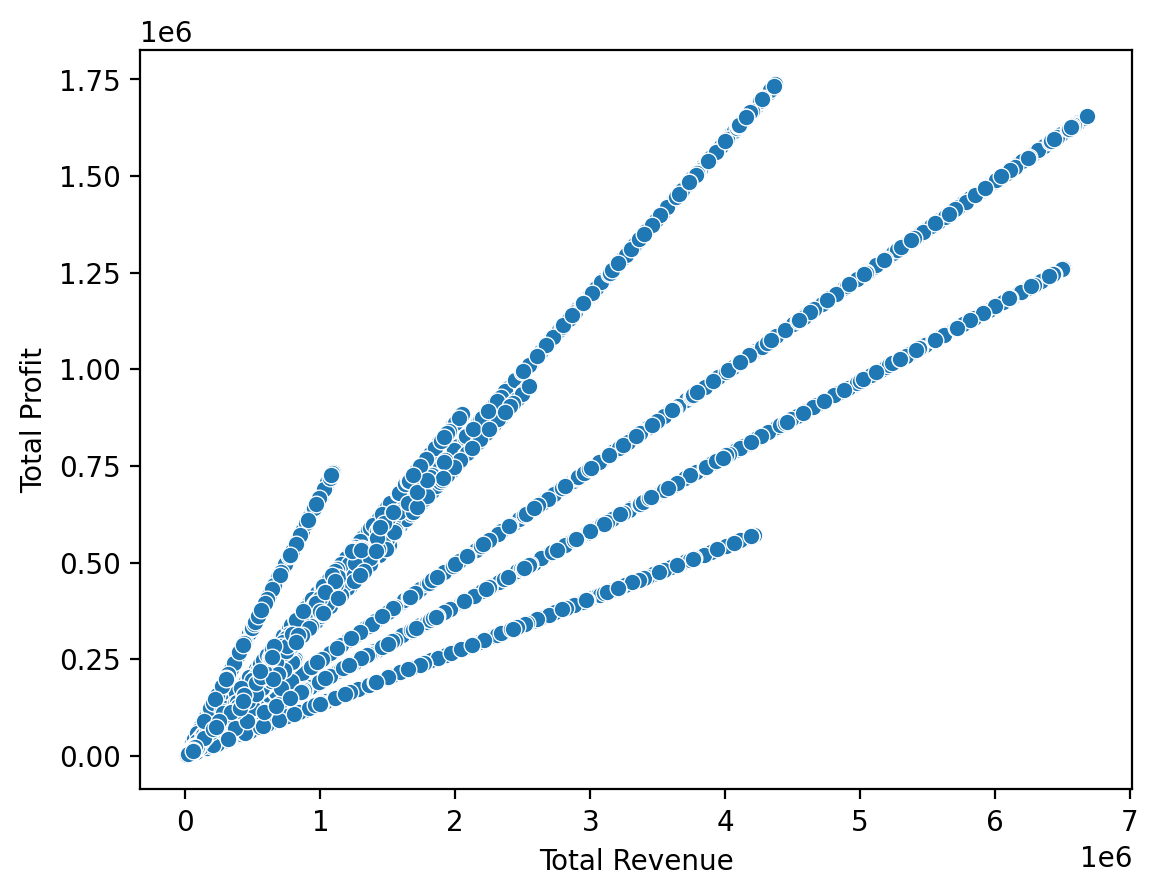

In [86]:
sns.scatterplot(x = "Total Revenue", y = "Total Profit", data = data)

C:\Users\Bank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month', ylabel='Total Profit'>

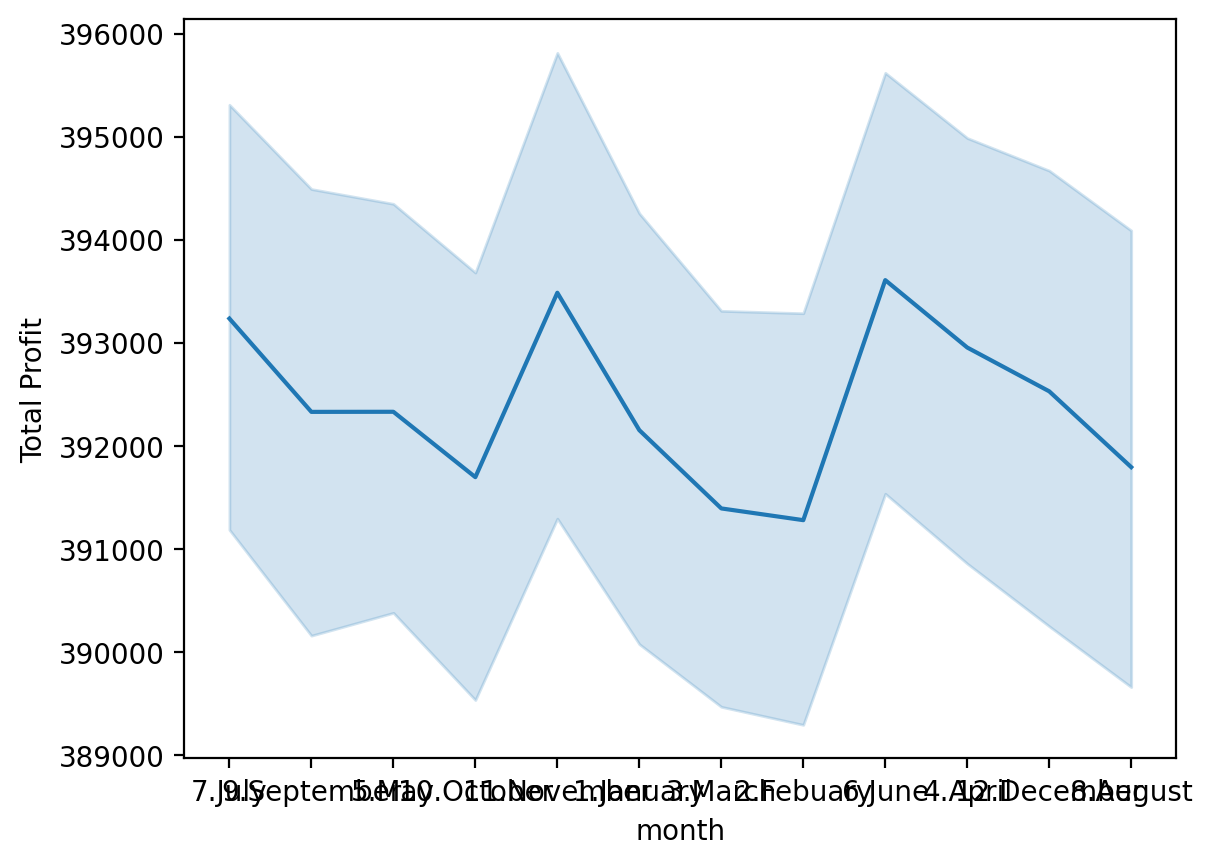

In [88]:
sns.lineplot(x = "month", y = "Total Profit", data = data)

<Axes: xlabel='month', ylabel='Total Profit'>

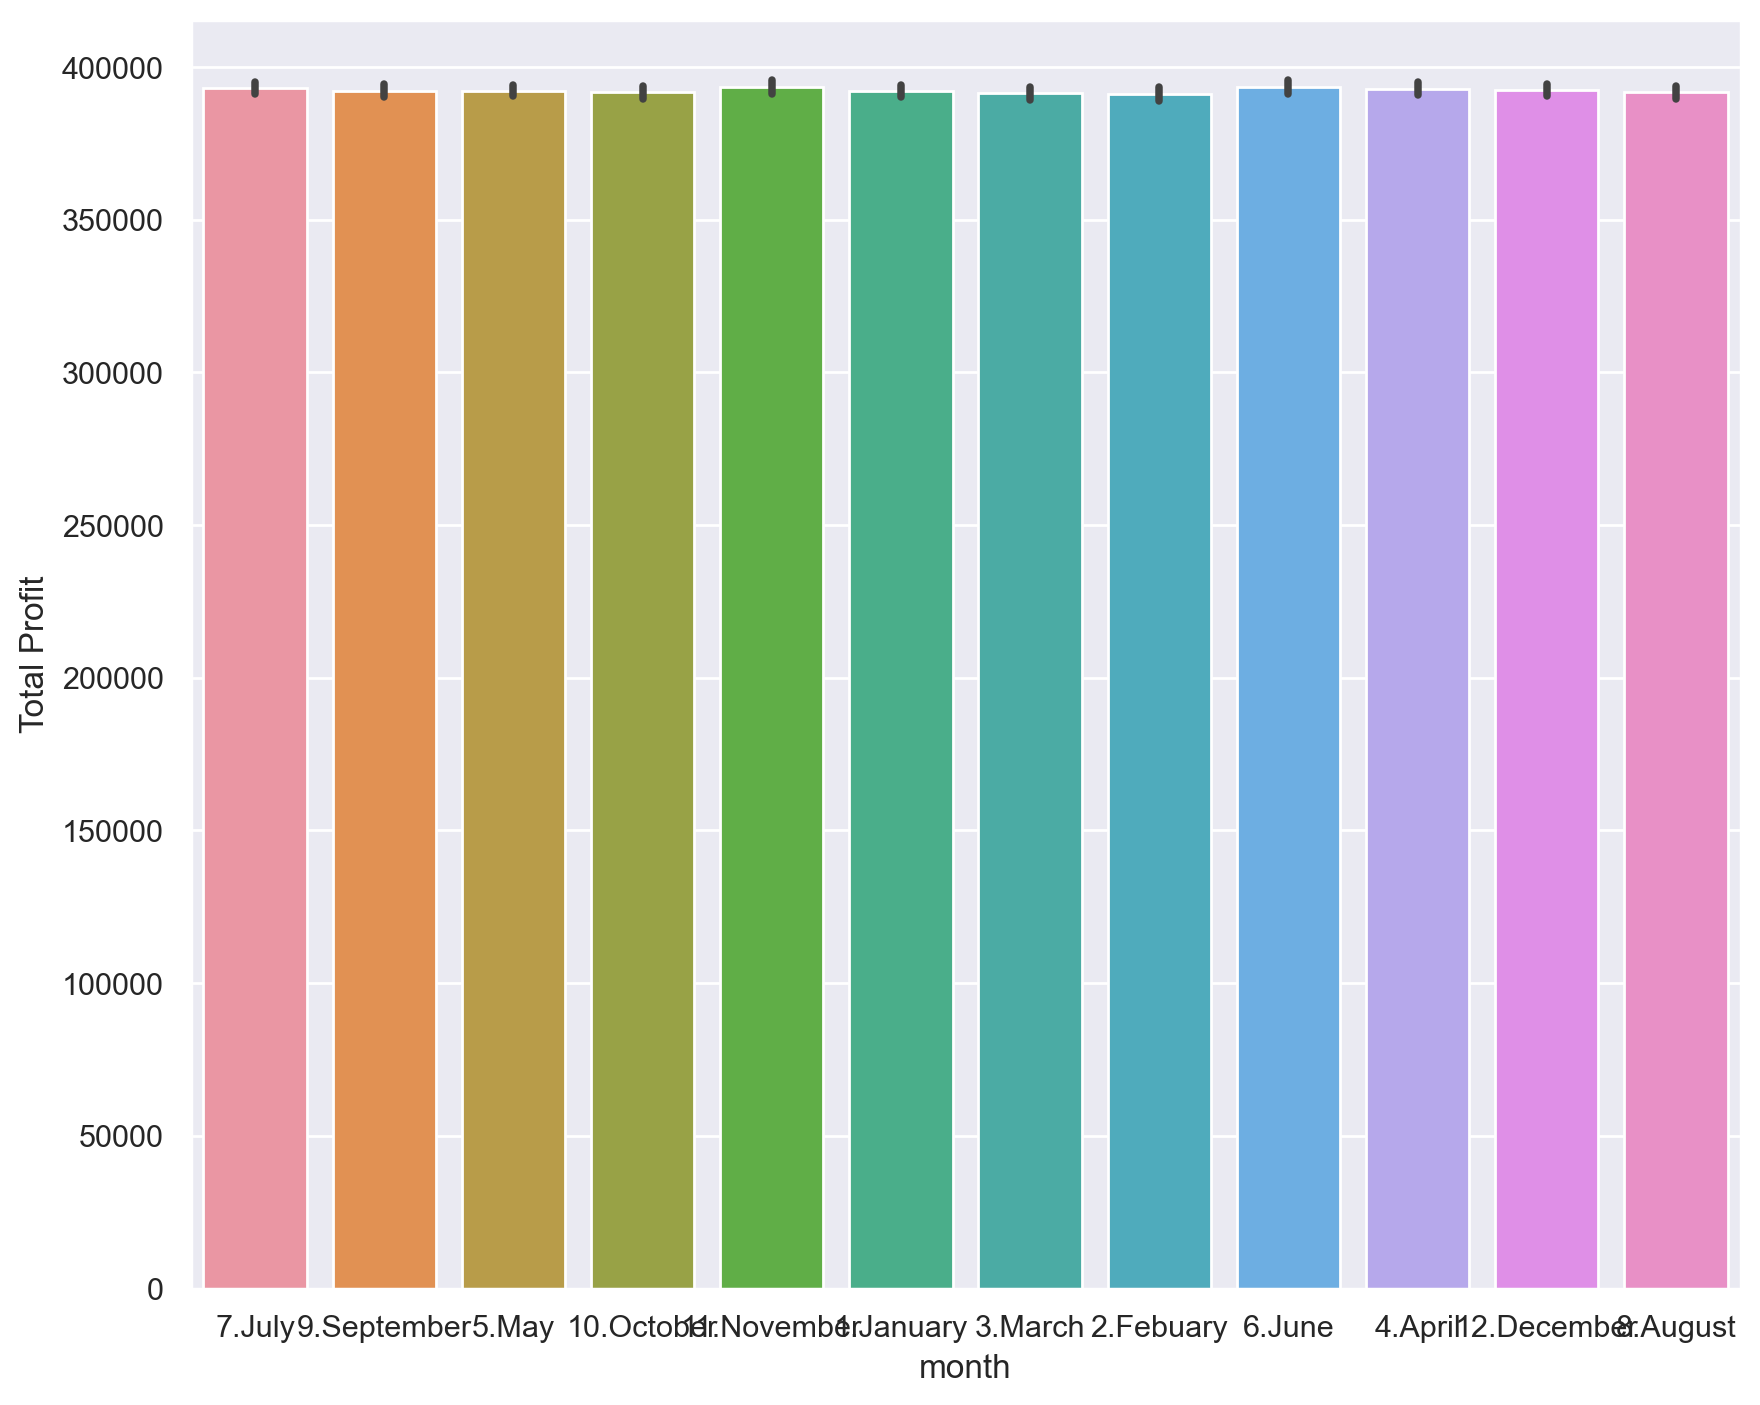

In [92]:
sns.barplot(x = "month", y = "Total Profit", data = data)

<Axes: xlabel='year', ylabel='%margin'>

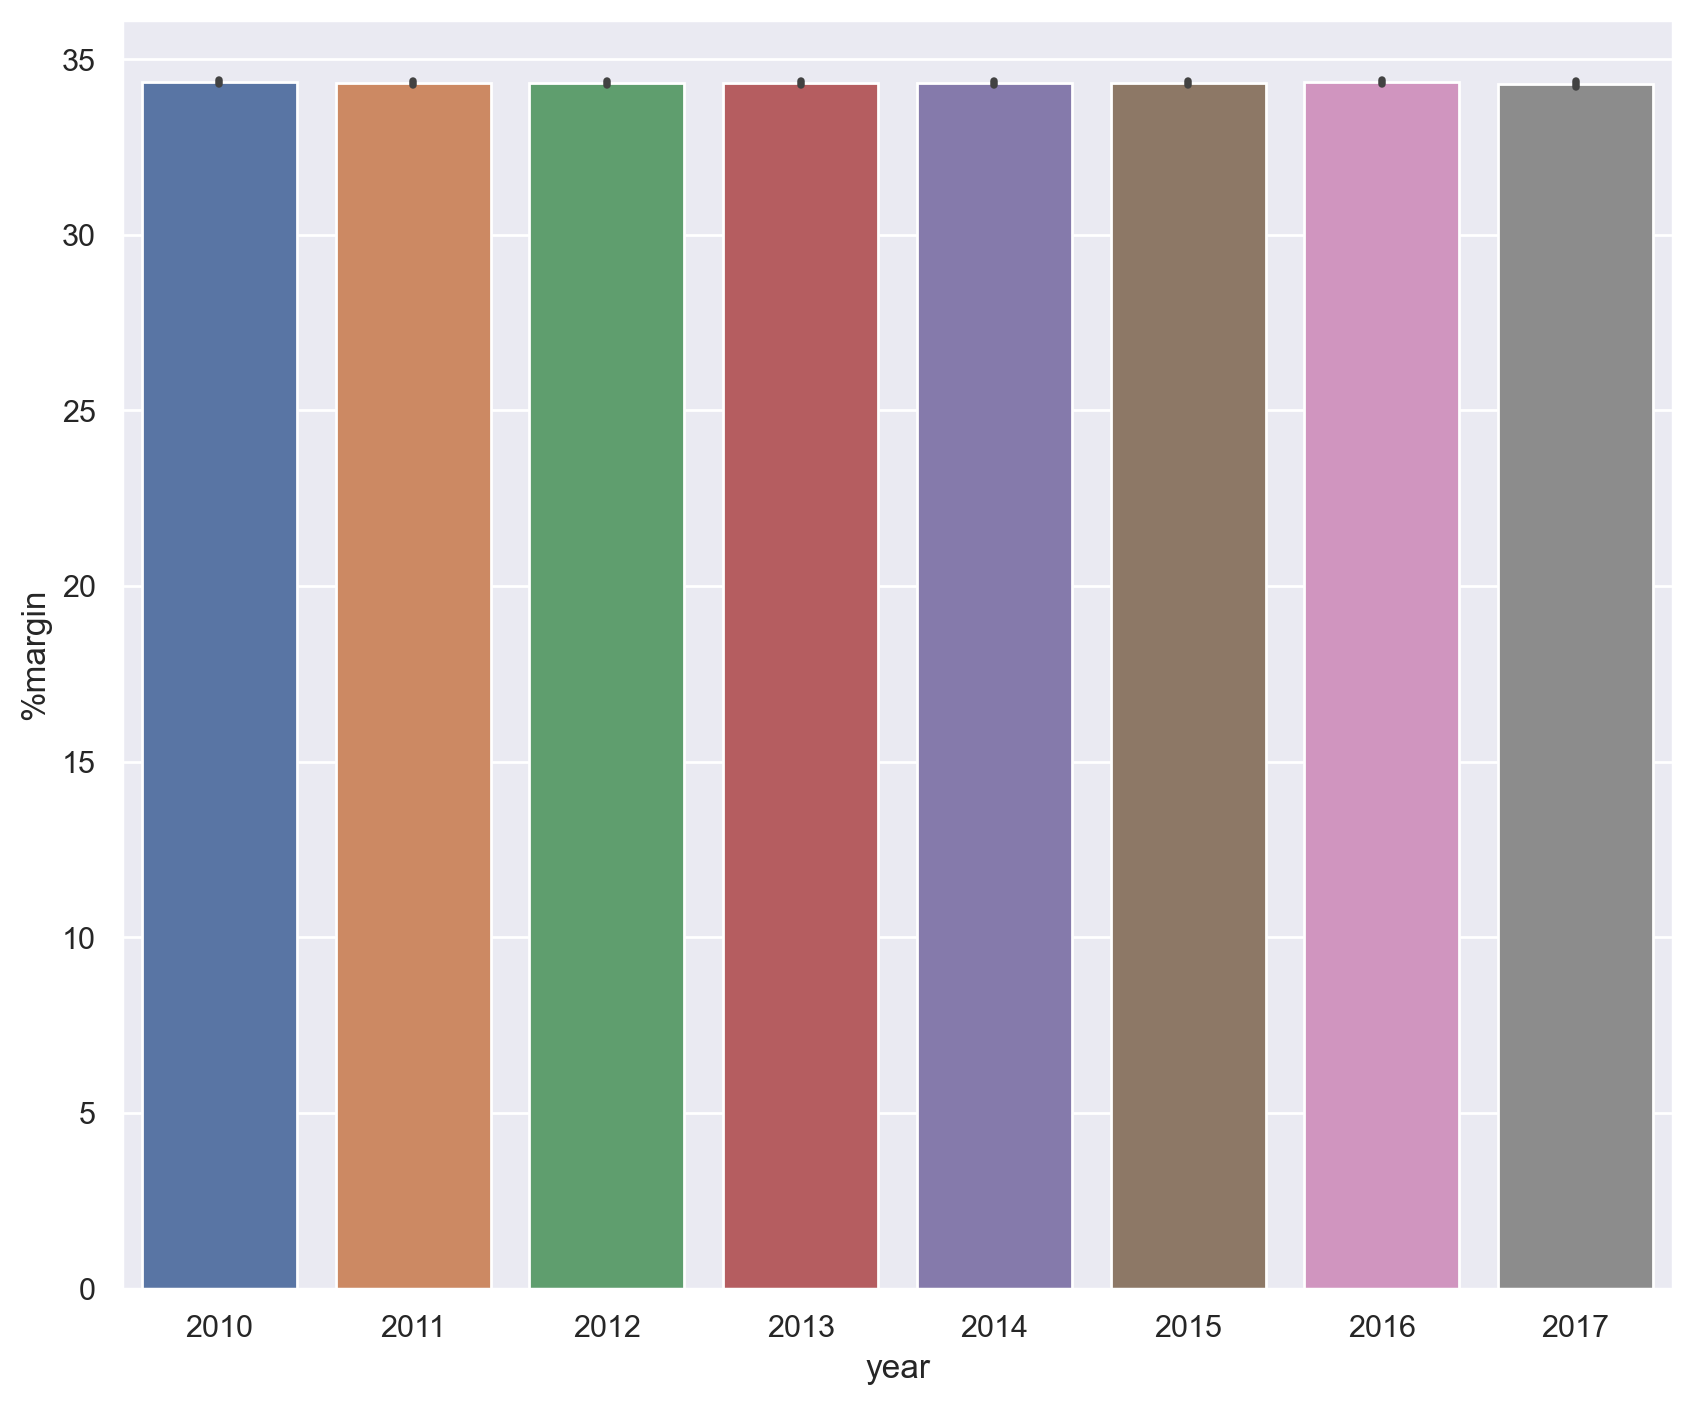

In [93]:
sns.barplot(x = "year", y = "%margin", data = data)

C:\Users\Bank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='%margin'>

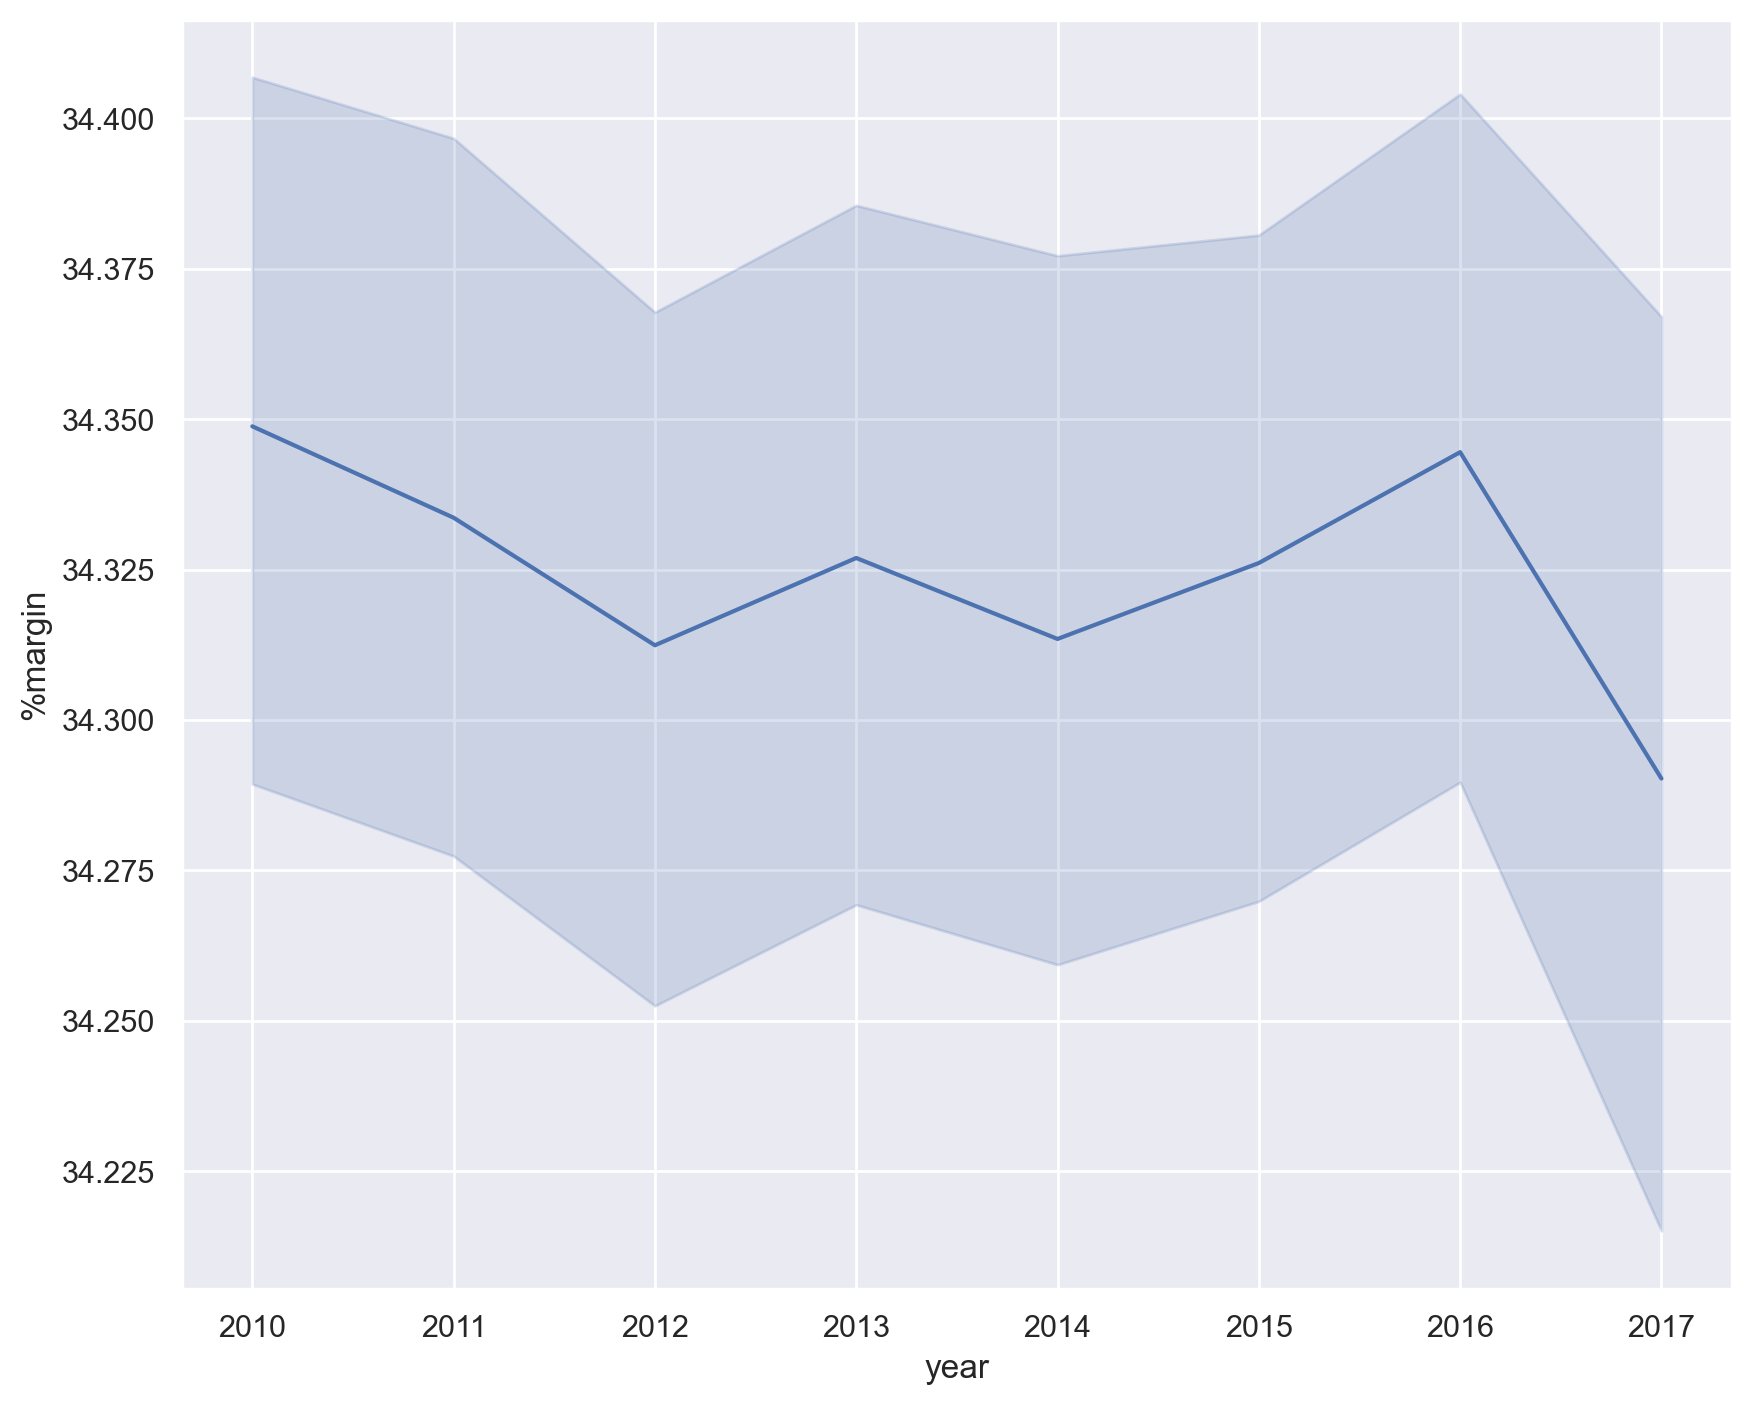

In [94]:
sns.lineplot(x = "year", y = "%margin", data = data)

C:\Users\Bank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='%margin'>

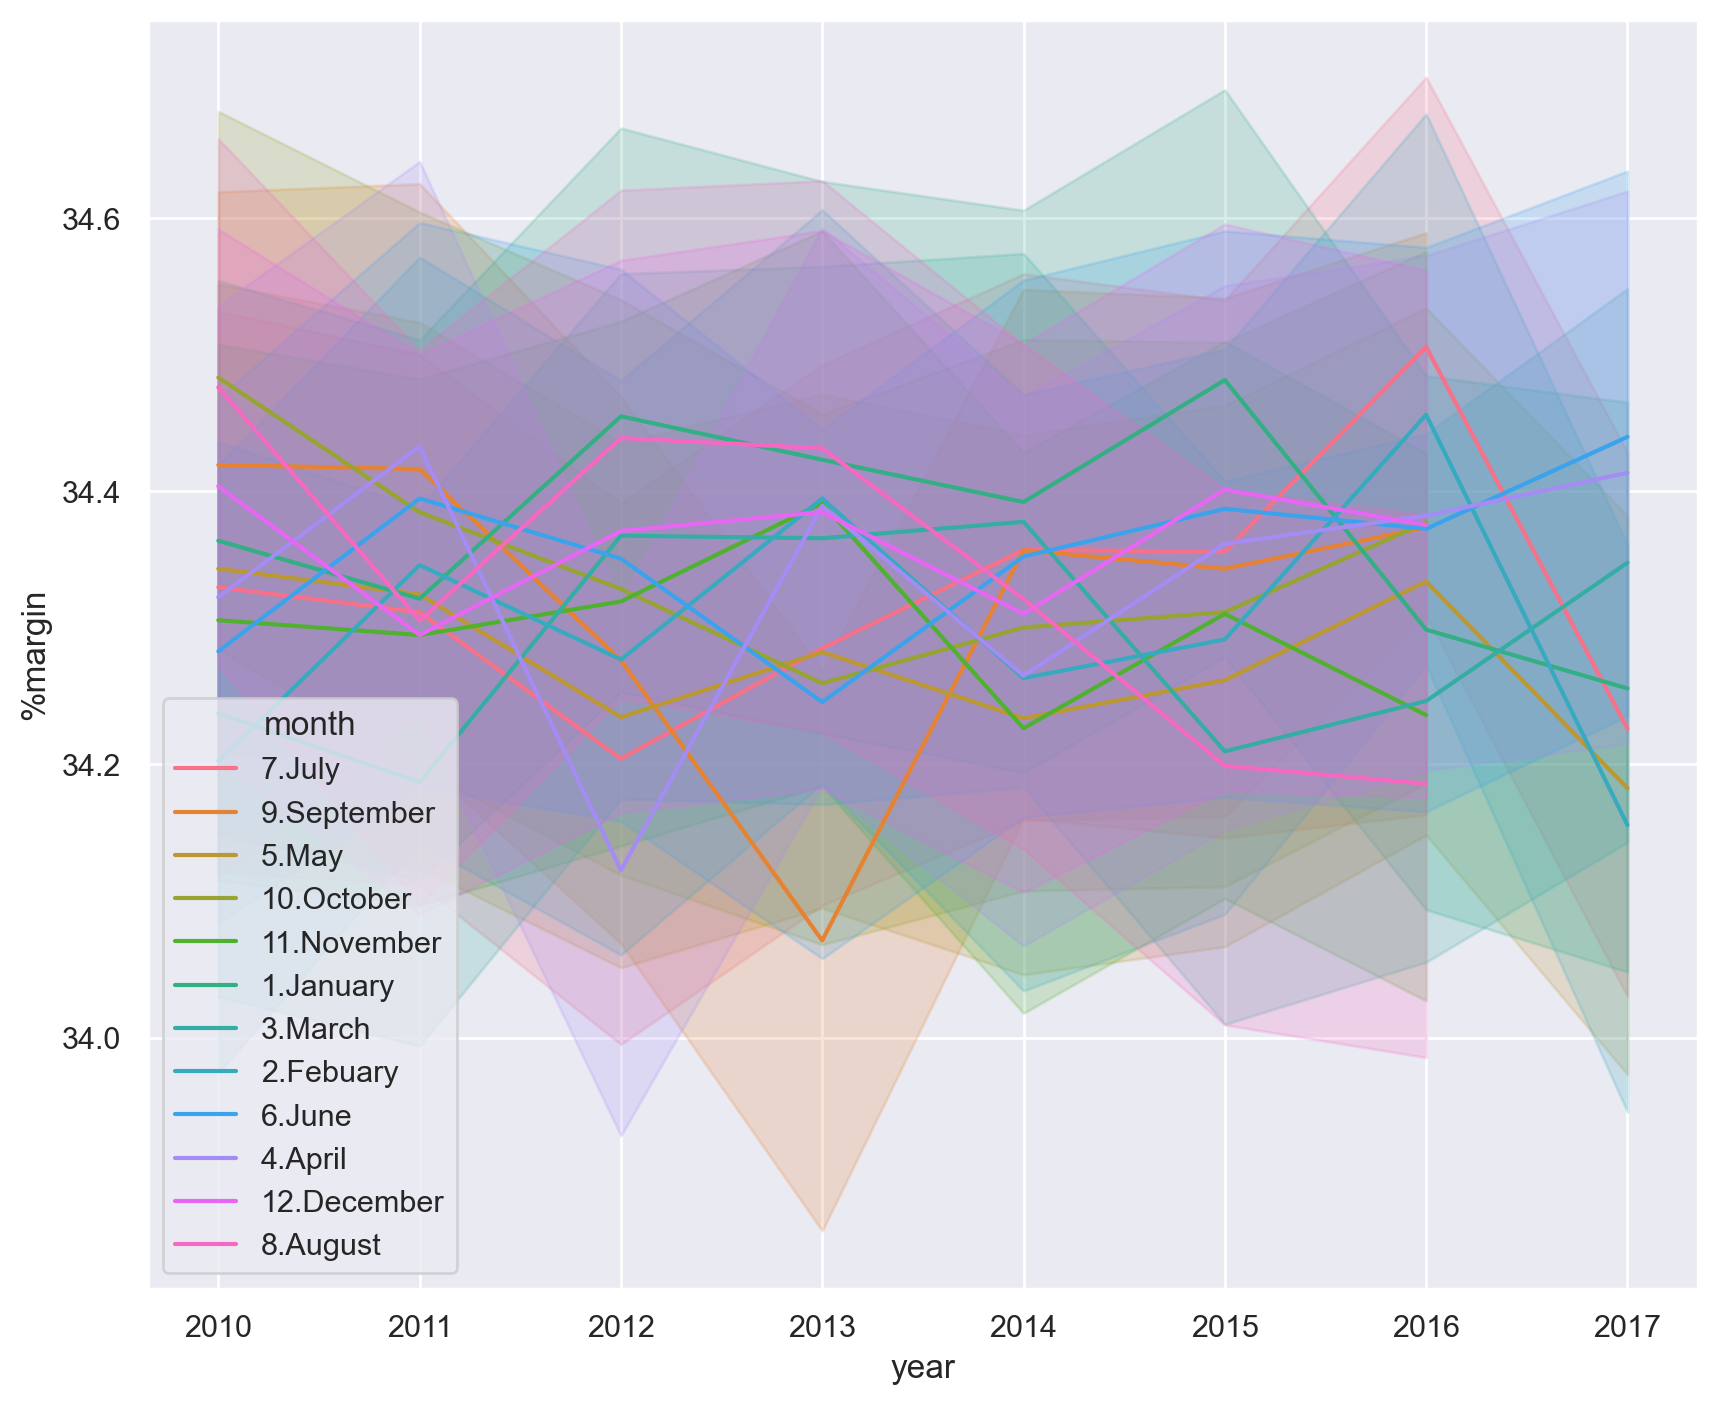

In [95]:
sns.lineplot(x = "year", y = "%margin", hue =  "month",data = data)

In [96]:
sns.set(rc={'figure.figsize':(10,8.24)}) 

C:\Users\Bank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='%margin'>

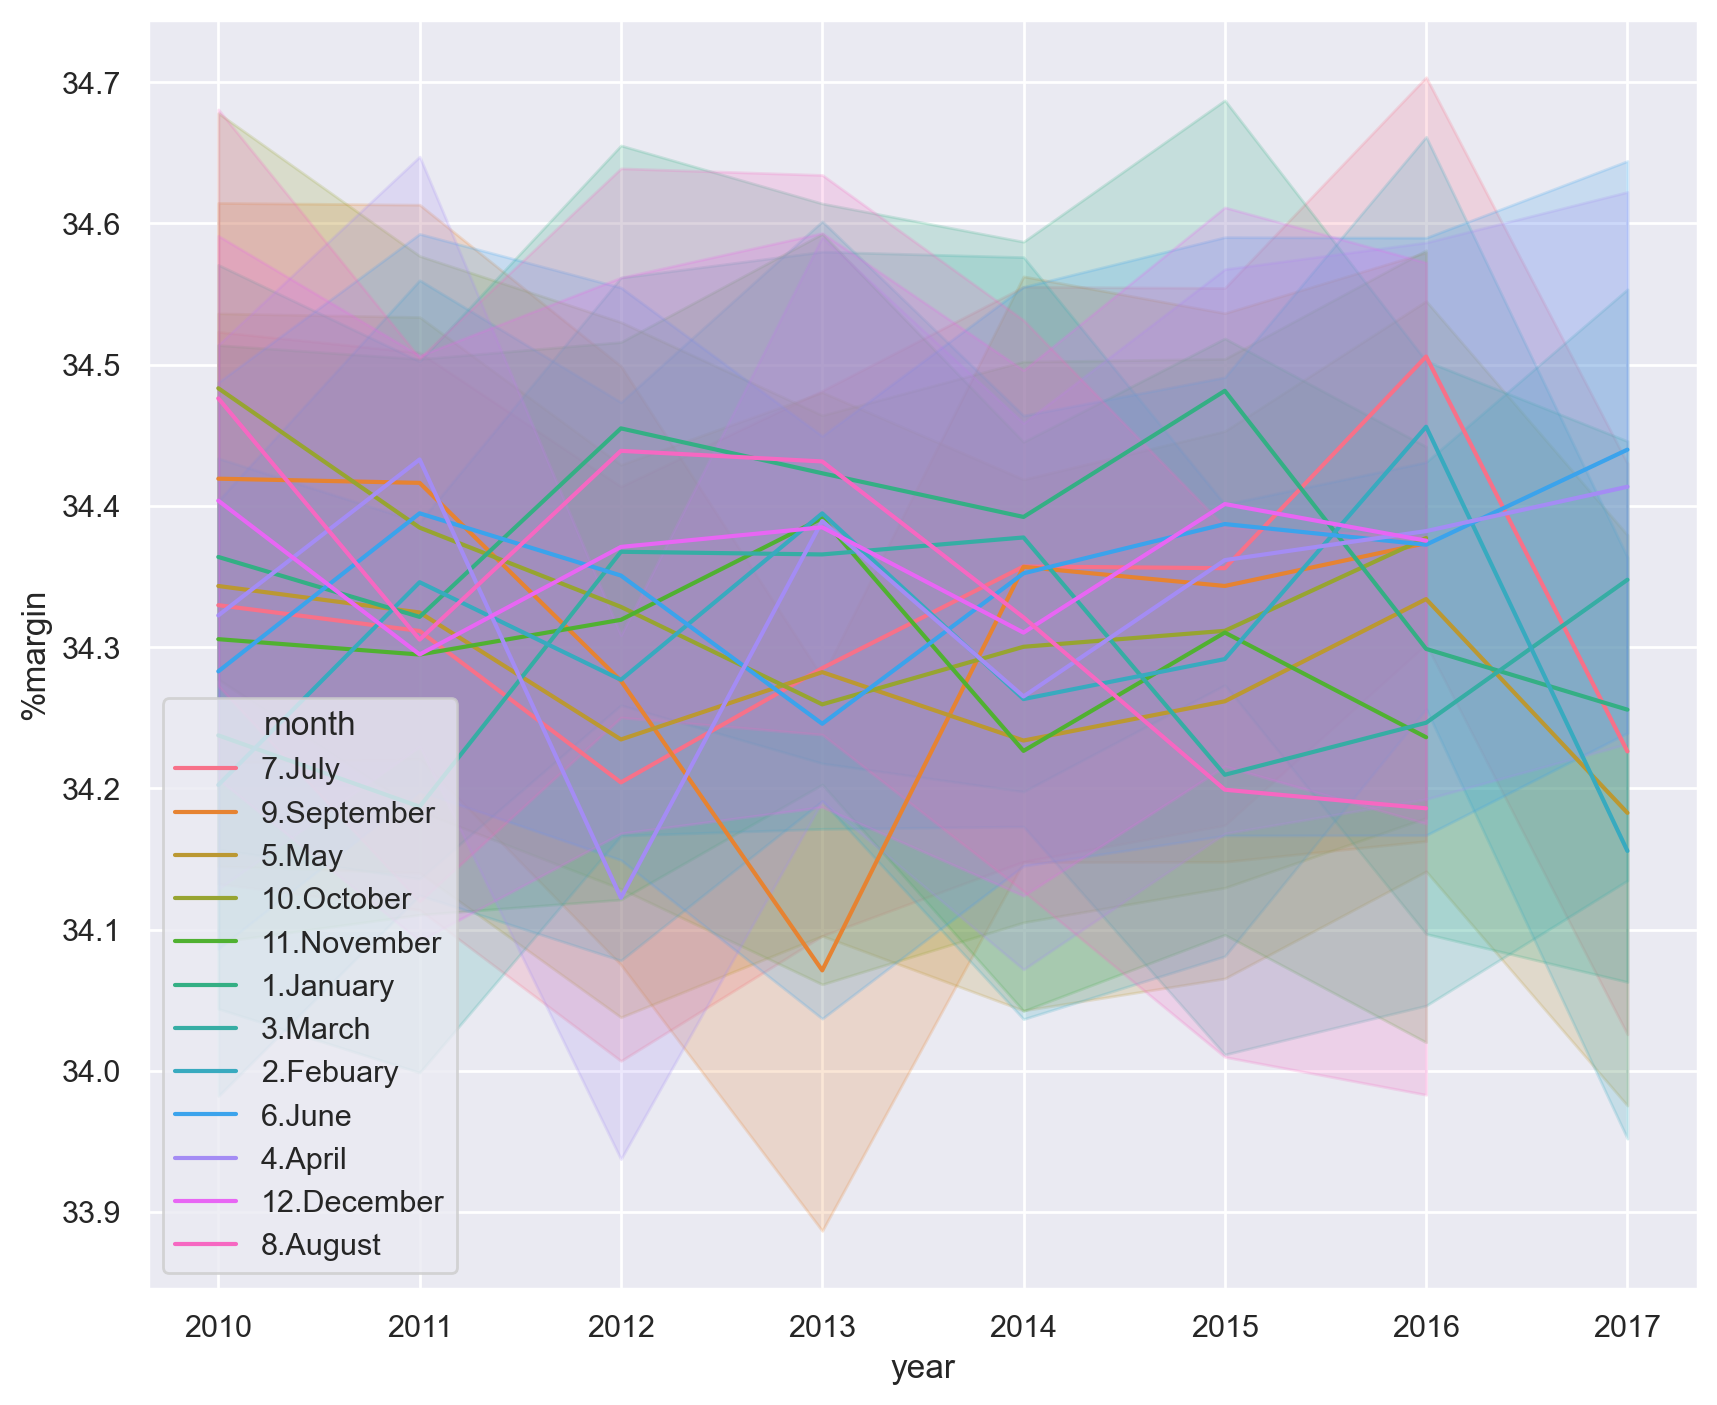

In [97]:
sns.lineplot(x = "year", y = "%margin", hue =  "month",data = data)

<Axes: xlabel='year', ylabel='%margin'>

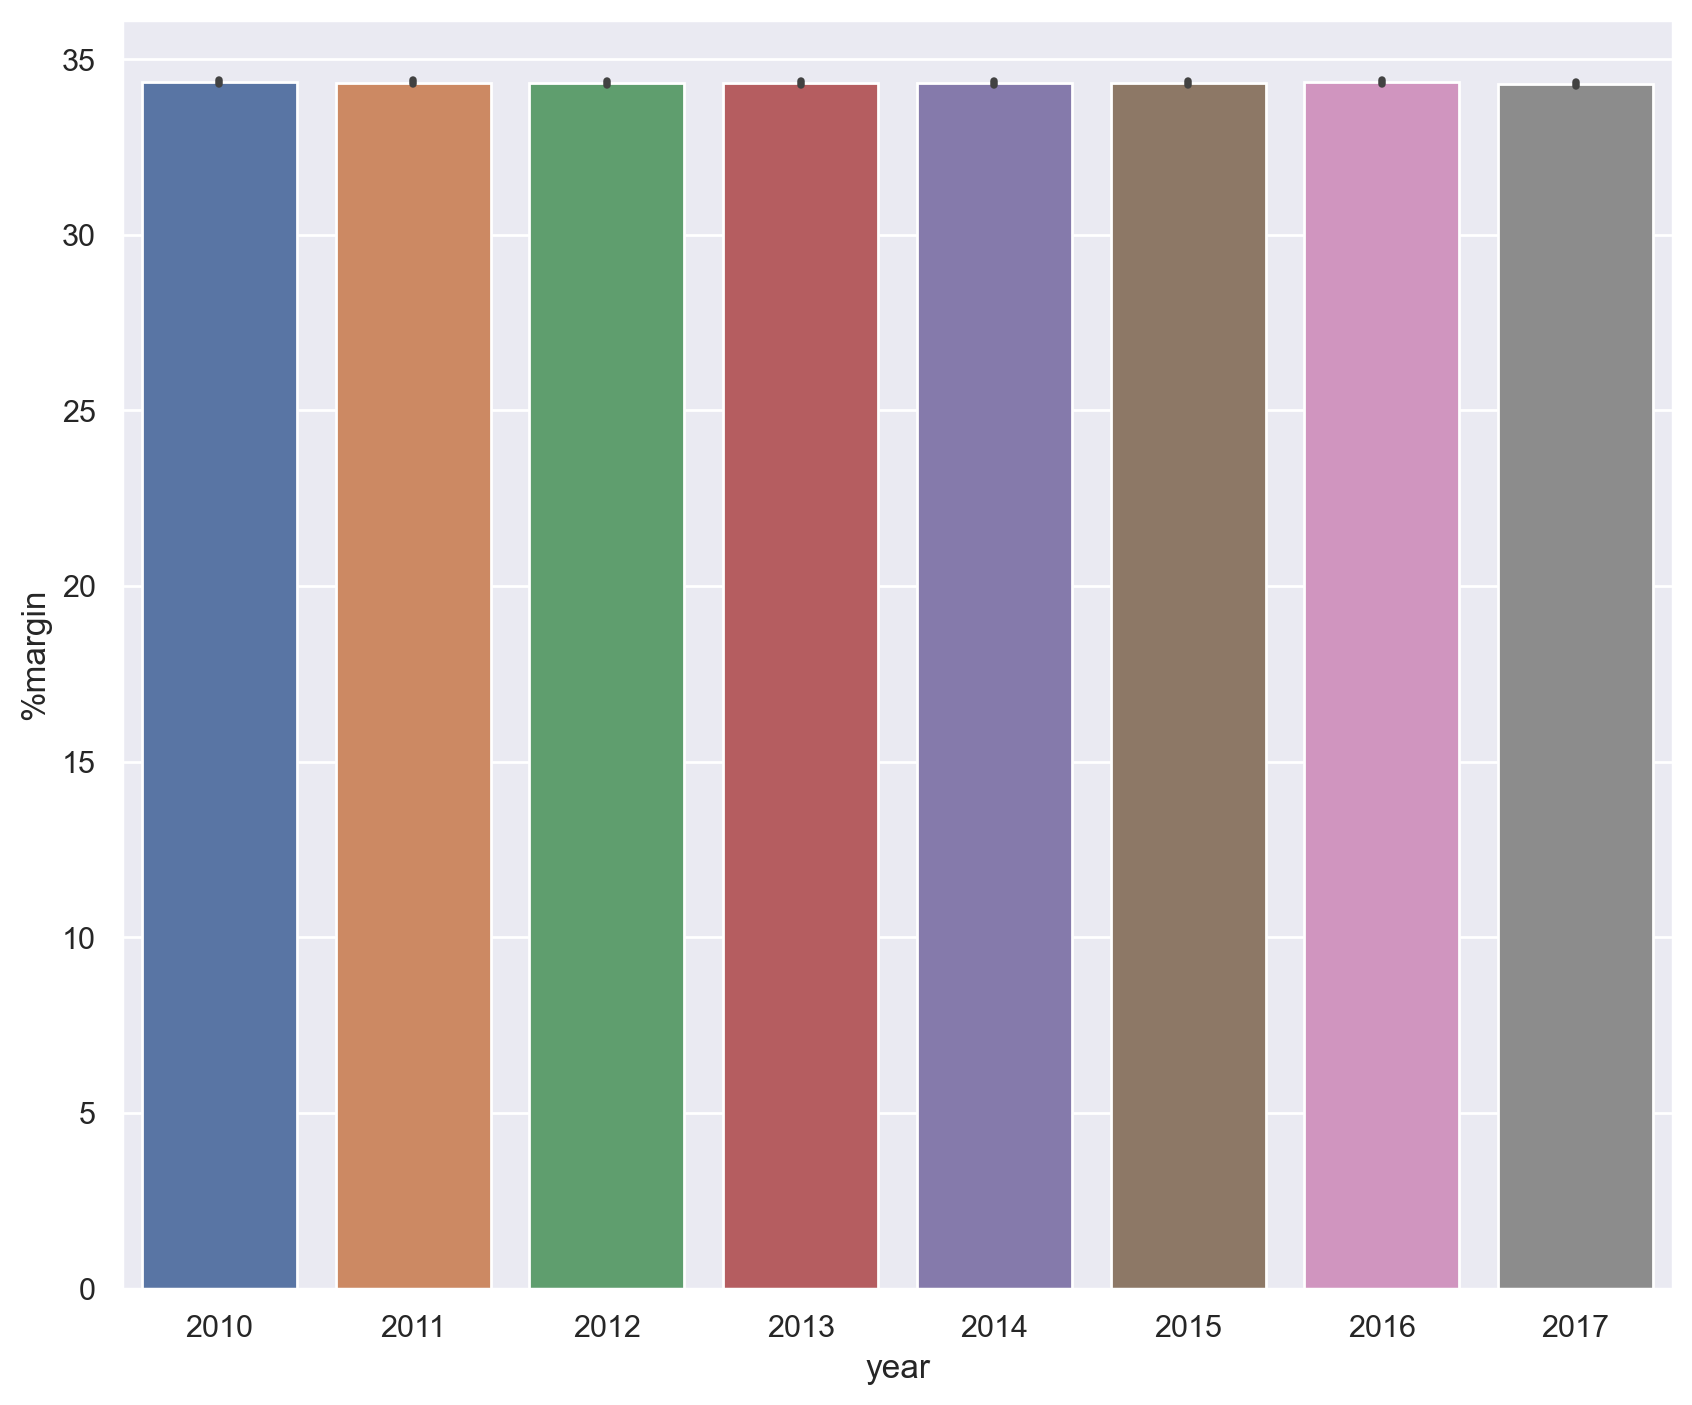

In [98]:
sns.barplot(x = "year", y = "%margin", data = data)

<Axes: xlabel='year', ylabel='Total Profit'>

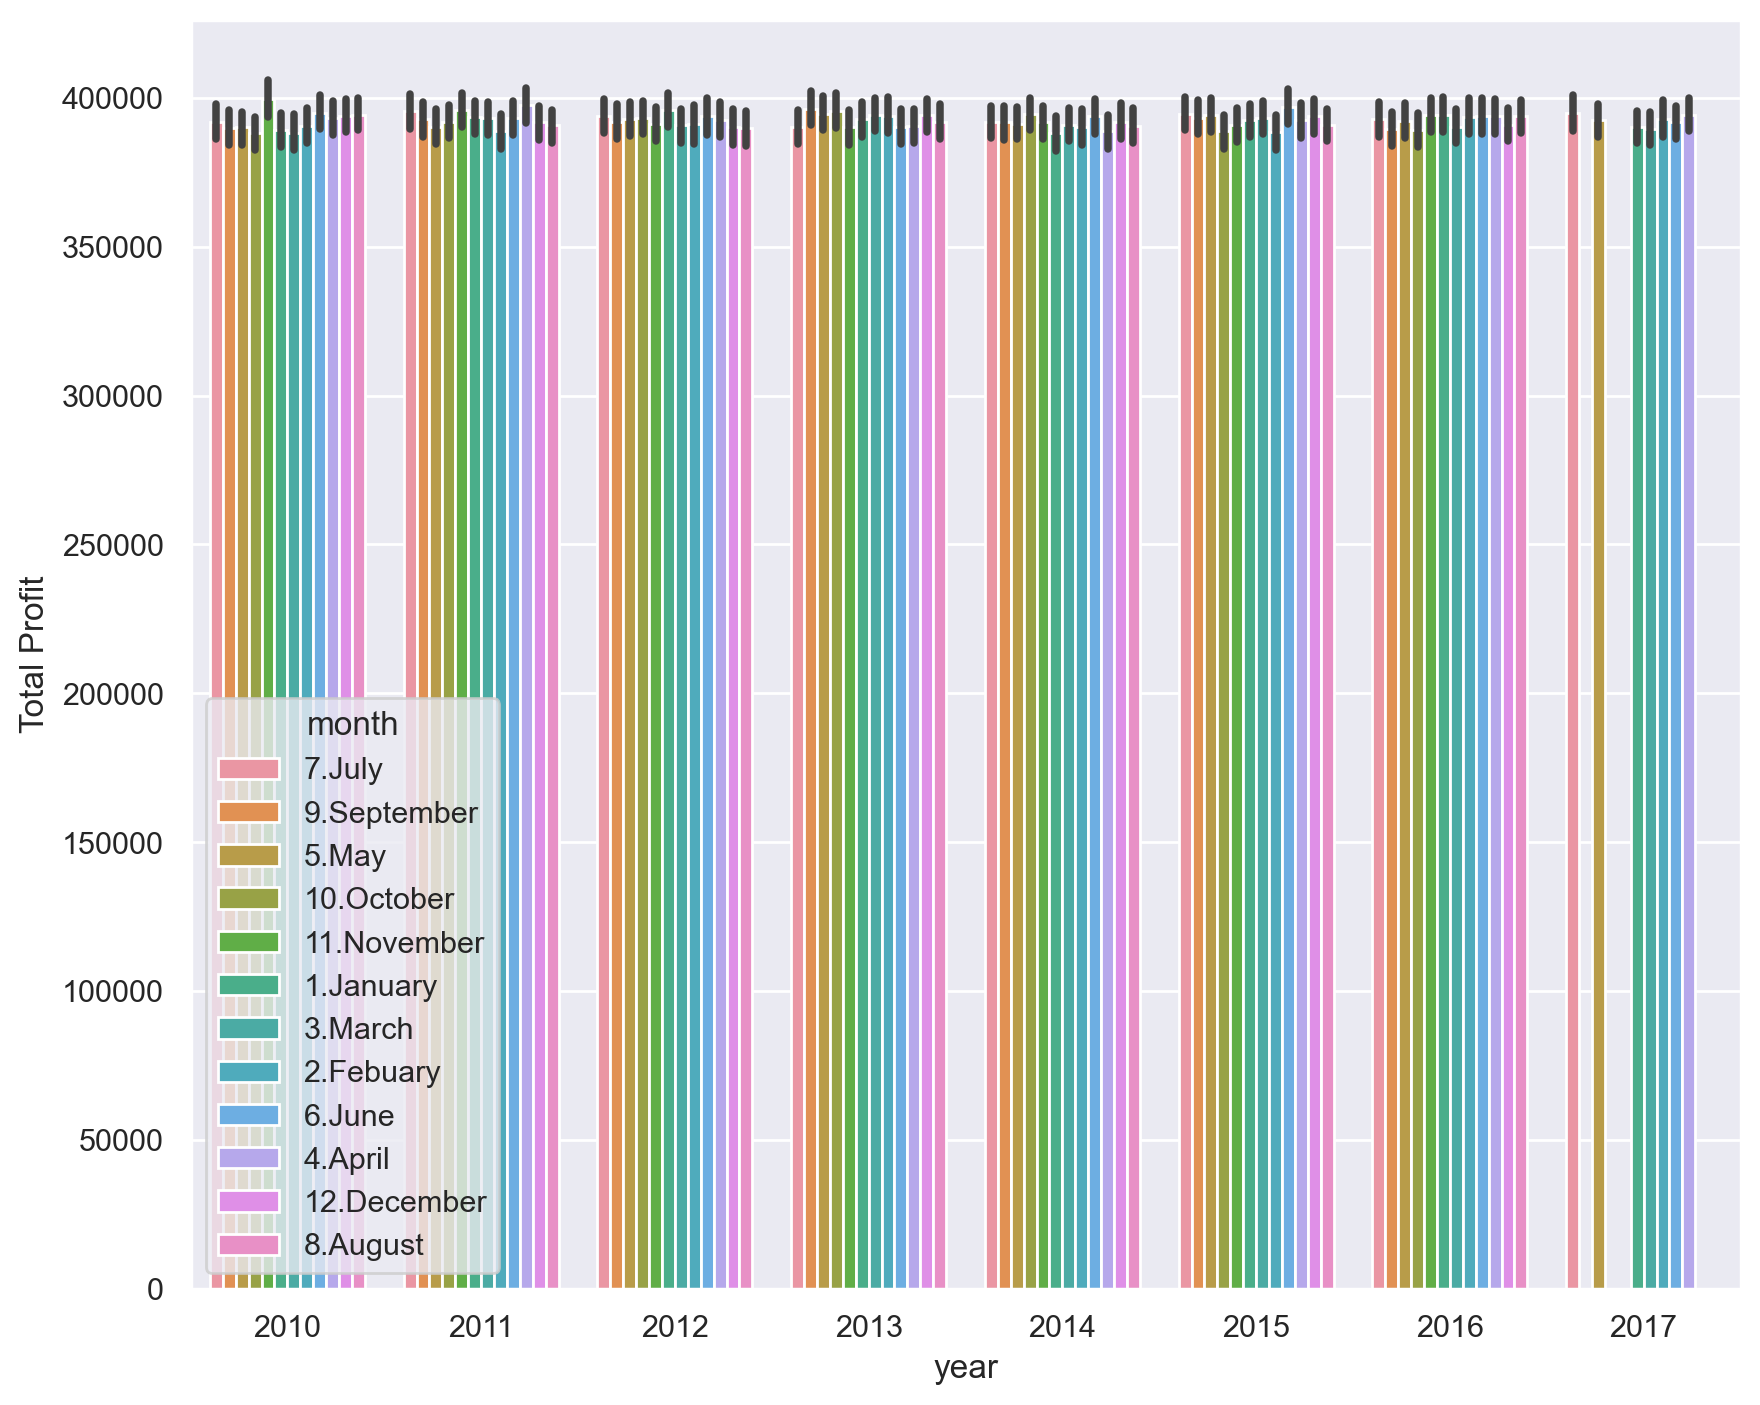

In [99]:
sns.barplot(x = "year", y = "Total Profit", hue = "month",data = data)

In [100]:
margin_top10 = data.sort_values("%margin", ascending = False).head(10)
margin_top10

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,year,month
1087185,Asia,South Korea,Clothes,Offline,H,2/9/2014,770135867,2/10/2014,9172,109.28,35.84,1002316.16,328724.48,673591.68,67.2,2014,2.Febuary
108726,Sub-Saharan Africa,Ethiopia,Clothes,Online,C,2/4/2011,222123229,2/17/2011,54,109.28,35.84,5901.12,1935.36,3965.76,67.2,2011,2.Febuary
1155029,Australia and Oceania,East Timor,Clothes,Offline,C,3/12/2010,260976207,3/15/2010,7514,109.28,35.84,821129.92,269301.76,551828.16,67.2,2010,3.March
402045,Europe,Germany,Clothes,Online,H,6/30/2013,367244899,7/22/2013,4781,109.28,35.84,522467.68,171351.04,351116.64,67.2,2013,6.June
402047,Australia and Oceania,Vanuatu,Clothes,Online,M,7/21/2011,586752593,8/4/2011,1986,109.28,35.84,217030.08,71178.24,145851.84,67.2,2011,7.July
780931,Asia,Vietnam,Clothes,Offline,H,2/28/2013,621288716,4/2/2013,1992,109.28,35.84,217685.76,71393.28,146292.48,67.2,2013,2.Febuary
1155015,Sub-Saharan Africa,Mali,Clothes,Offline,H,12/13/2015,175936019,1/23/2016,2233,109.28,35.84,244022.24,80030.72,163991.52,67.2,2015,12.December
108725,Sub-Saharan Africa,Ethiopia,Clothes,Online,C,2/4/2011,222123229,2/17/2011,54,109.28,35.84,5901.12,1935.36,3965.76,67.2,2011,2.Febuary
1406423,Sub-Saharan Africa,Comoros,Clothes,Offline,C,11/28/2010,882583510,12/2/2010,4929,109.28,35.84,538641.12,176655.36,361985.76,67.2,2010,11.November
1043226,Europe,Montenegro,Clothes,Offline,L,5/13/2011,102287709,5/25/2011,8061,109.28,35.84,880906.08,288906.24,591999.84,67.2,2011,5.May


AttributeError: 'numpy.int32' object has no attribute 'startswith'

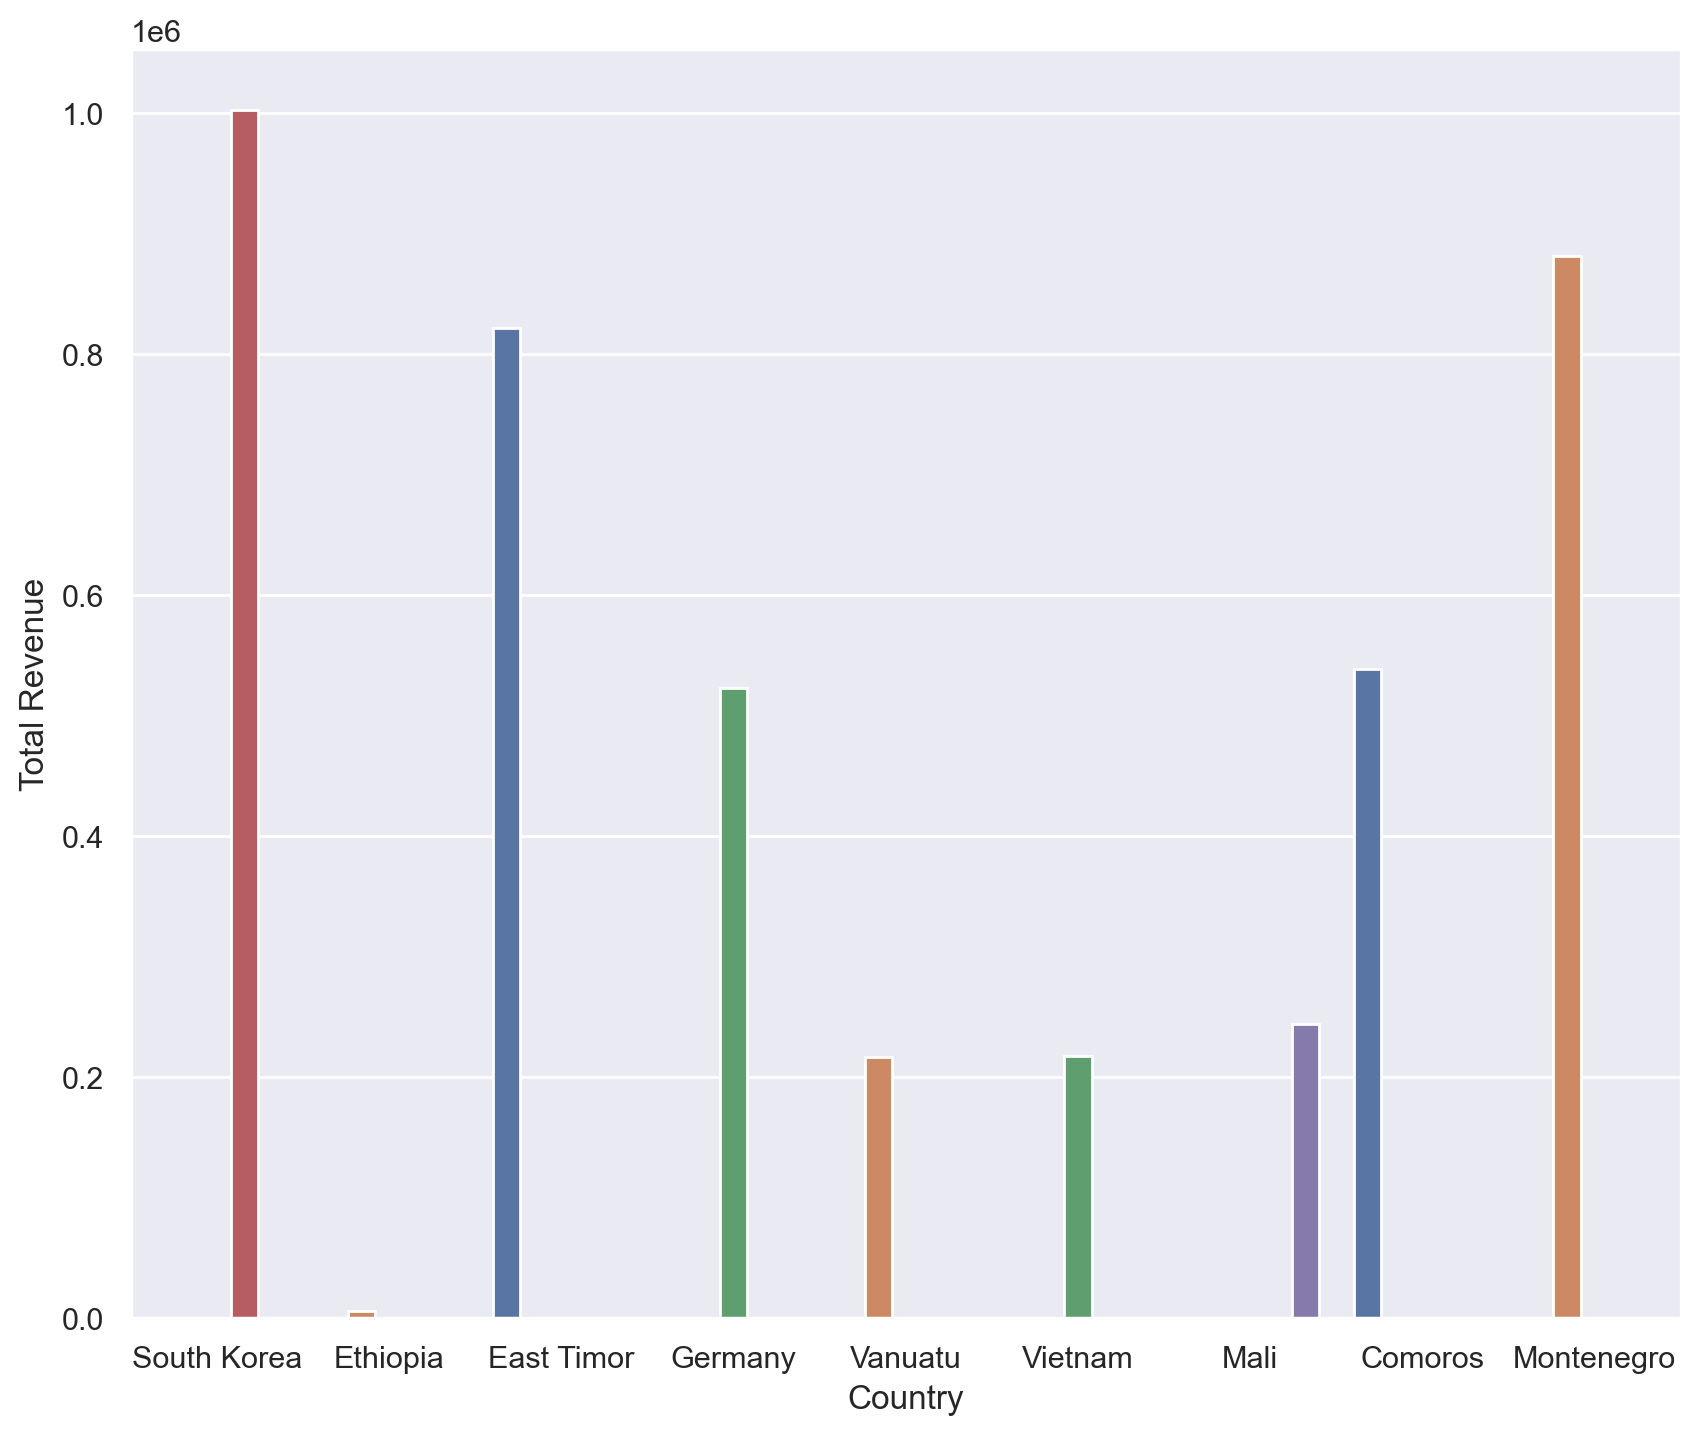

In [101]:
sns.barplot(x = "Country", y = "Total Revenue",hue = "year",data = margin_top10)

In [ ]:
margin_top10["Total Revenue"]

In [ ]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

In [ ]:
plt.pie(margin_top10["Total Revenue"], labels=margin_top10["Region"], colors=colors, startangle=90,autopct='%1.1f%%')

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [91]:
print(f'sklern version : {sklearn.__version__}')

sklern version : 1.2.2


In [104]:
model = LinearRegression()
model

LinearRegression()

In [105]:
X = data[['Total Revenue','Total Cost']]
y = data['%margin'] 

In [106]:
model.fit(X,y)

LinearRegression()

In [107]:
model.score(X,y)

0.5312463604621267

In [108]:
model.coef_ 

array([ 3.38013701e-05, -4.75858163e-05])

In [109]:
model.intercept_

33.985534314659624

In [110]:
model.intercept_ + (-3.38013701e-05* 50000)+(-4.75858163e-05*20000)

31.343749483659625

In [111]:
model.predict([[50000,20000]])

C:\Users\Bank\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34.72388649])

In [112]:
model.predict([[50000,20000],[70000,60000]])

C:\Users\Bank\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34.72388649, 33.49648124])

In [113]:
y_pred = model.predict(data[["Total Revenue","Total Cost"]])
y_pred

array([33.9633485 , 33.9633485 , 43.15376114, ..., 36.77049709,
       39.81259888, 34.41462739])

In [114]:
y_act = data[["%margin"]]

In [115]:
mean_squared_error(y_act, y_pred)

81.067238978305

In [116]:
mean_squared_error(y_act, y_pred) **0.5  

9.0037347238968

In [117]:
data["model"] = model.predict(data[["Total Revenue","Total Cost"]])
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,year,month,model
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,2012,7.July,33.963348
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,2012,7.July,33.963348
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,2013,9.September,43.153761
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,2013,9.September,43.153761
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00,13.56,2015,5.May,32.871834


In [118]:
margin_top1000_model = data.sort_values("%margin", ascending = False).head(1000)

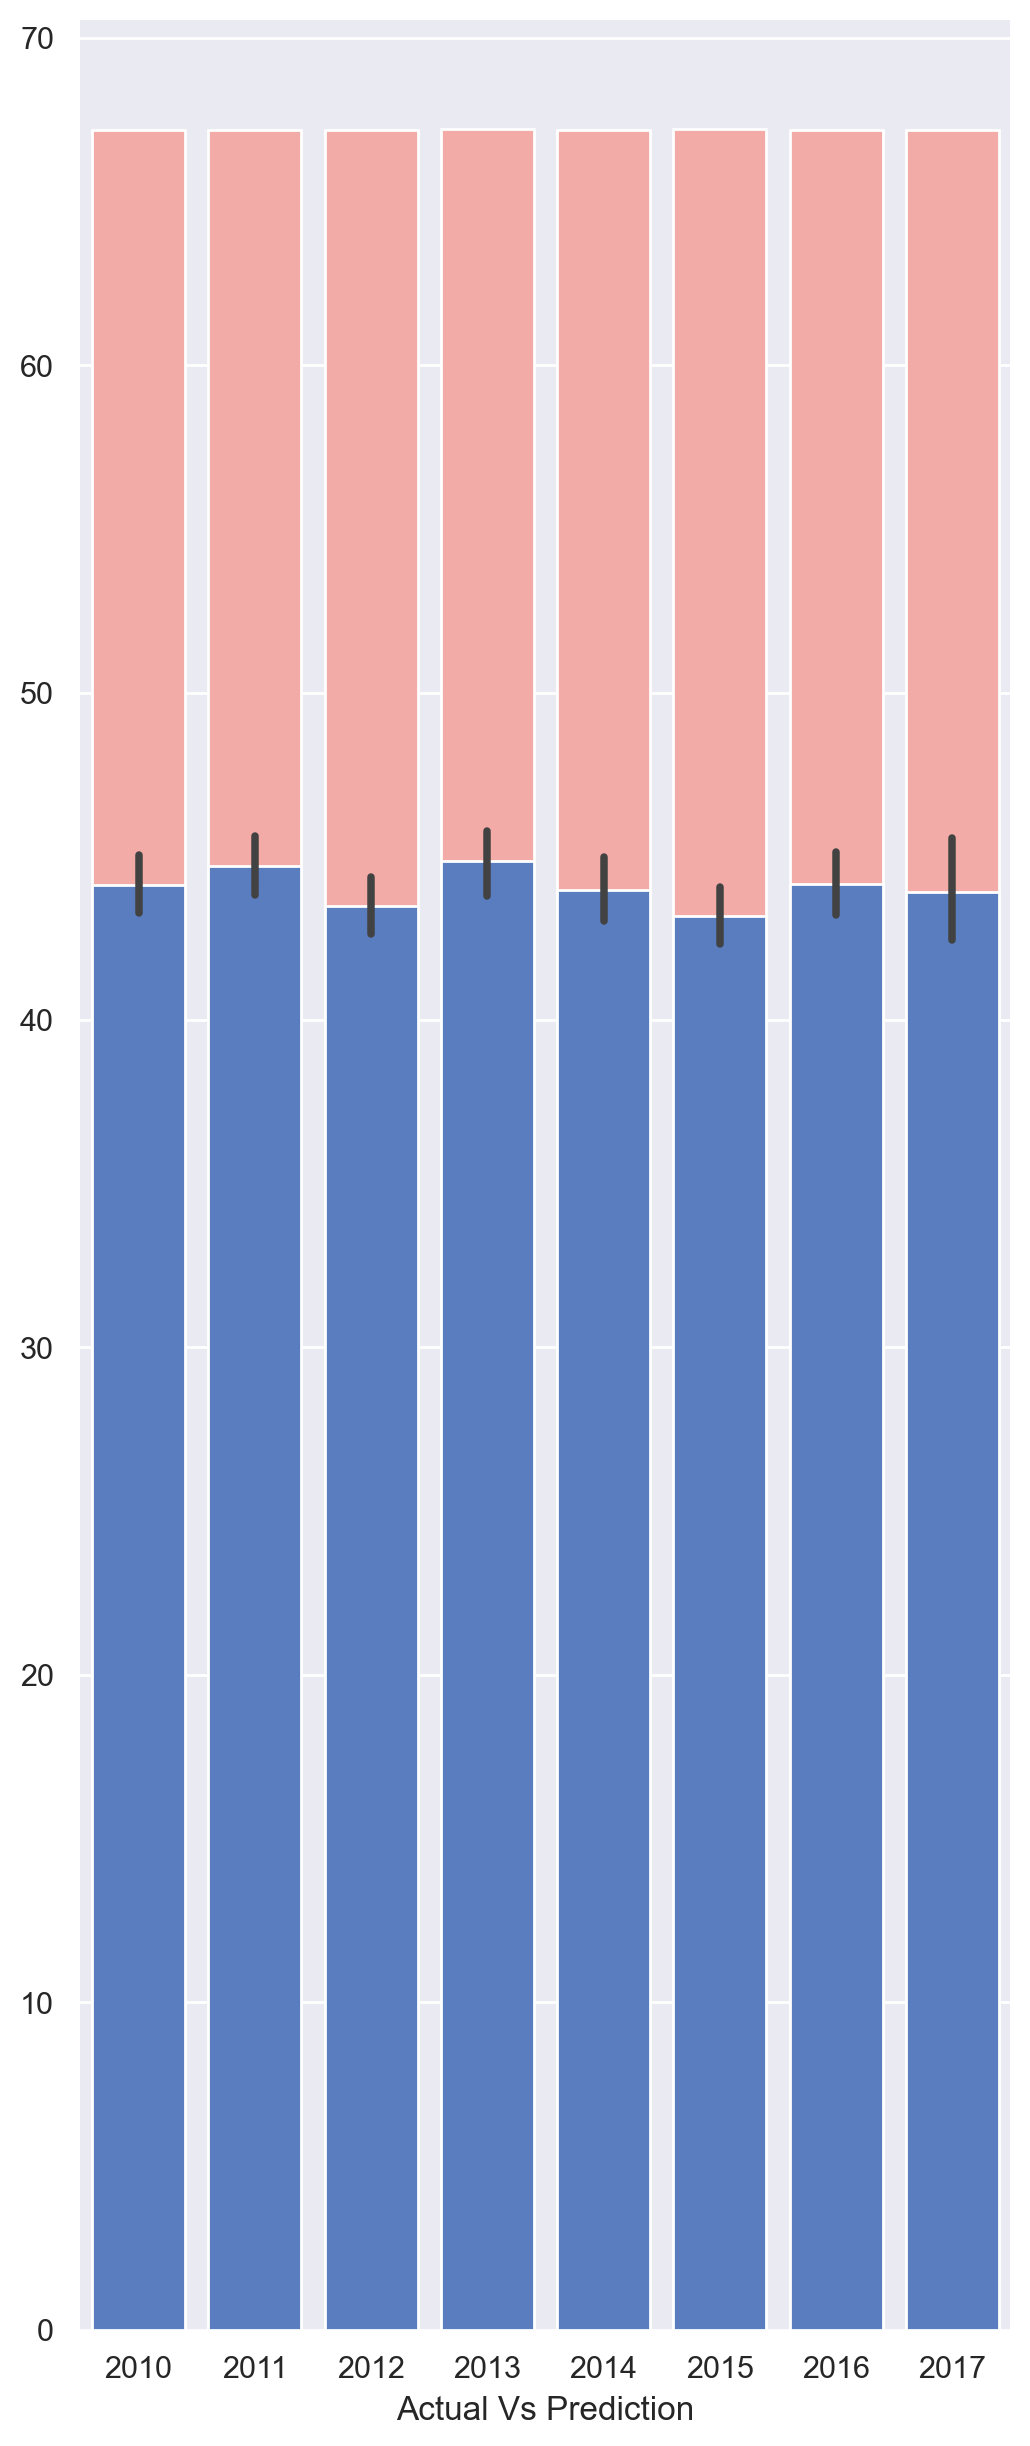

In [119]:
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(x="year", y="%margin", data=margin_top1000_model,
            label="Actual", color="r")


sns.set_color_codes("muted")
sns.barplot(x="year", y="model", data=margin_top1000_model,
            label="Prediction", color="b")

# Add a legend and informative axis label
ax.set(ylabel="",
       xlabel="Actual Vs Prediction")
sns.despine(left=True, bottom=True)